# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [484]:
# Importing necessary libraries to use
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

sns.set_style('whitegrid')
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [485]:
# Reading csv files 

def clear_duplicates():
    df = pd.read_csv("own_test.csv")
    df.drop_duplicates(inplace=True)
    df.to_csv("own_test.csv", index=False)

# Setting column index to 0 to remove unnamed columns 
df_saudi_accidents = pd.read_csv("../../../../week2/day5/Project1/data/saudi-arabia-traffic-accidents-2008.csv", sep = ';', index_col=0)
df_saudi_licenses = pd.read_csv("../../../../week2/day5/Project1/data/saudi-arabia-driving-licenses-2004-2008.csv", sep = ';', index_col=0)
df_saudi_accidents_18 = pd.read_csv("/Users/ghalib/Desktop/DSI7/week2/day5/Project1/data/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008.csv", sep = ';')
df_saudi_licenses_18 = pd.read_csv("/Users/ghalib/Desktop/DSI7/week2/day5/Project1/data/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008.csv", sep = ';')

# Dropping hte second unnamed column in the df_saudi_accidents CSV
df_saudi_accidents.drop('Unnamed: 0.1', axis=1, inplace=True)

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [486]:
# Printing first 10 rows 
df_saudi_accidents.head(10)

,Year,Region,Indicator,Value,geo_point_2d
0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [487]:
# Printing first 10 rows 
df_saudi_licenses.head(10)

,Year,Administritive Area,Driving Liceses,geo_point_2d
0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [488]:
# Dropiing unnecessary columns (additional data provided)
df_saudi_accidents_18.drop('geo_shape', axis=1, inplace=True)

# Only taking 2018 rows 
df_saudi_accidents_18 = df_saudi_accidents_18.loc[df_saudi_accidents_18['Year'] == 2018]
df_saudi_accidents_18.reset_index()

,index,Year,Region,Indicator,Value,geo_point_2d
0,2,2018,Al-Jouf,No. of Accidents,7355,"29.9677445762,39.5570371172"
1,3,2018,Qassim,No. of Casualties - Injured,1269,"26.1967063704,43.3429998455"
2,6,2018,Asir,No. of Accidents,25964,"19.1387847401,42.941470036"
3,7,2018,Makkah,No. of Casualties - Dead,1301,"21.628962766,41.2636898334"
4,8,2018,Najran,No. of Casualties - Injured,654,"18.4511003068,46.8688495726"
5,9,2018,Total,No. of Casualties - Dead,6025,NaN
6,10,2018,Jazan,No. of Casualties - Dead,563,"17.2072313962,42.6525807422"
7,11,2018,Hail,No. of Accidents,6955,"27.400845724,41.4406960508"
8,12,2018,Eastern Region,No. of Casualties - Injured,2969,"23.2883307307,50.1478302439"
9,13,2018,Qassim,No. of Accidents,17510,"26.1967063704,43.3429998455"


In [489]:
# Printing first 10 rows 
df_saudi_accidents_18.head(10)

,Year,Region,Indicator,Value,geo_point_2d
2,2018,Al-Jouf,No. of Accidents,7355,"29.9677445762,39.5570371172"
3,2018,Qassim,No. of Casualties - Injured,1269,"26.1967063704,43.3429998455"
6,2018,Asir,No. of Accidents,25964,"19.1387847401,42.941470036"
7,2018,Makkah,No. of Casualties - Dead,1301,"21.628962766,41.2636898334"
8,2018,Najran,No. of Casualties - Injured,654,"18.4511003068,46.8688495726"
9,2018,Total,No. of Casualties - Dead,6025,NaN
10,2018,Jazan,No. of Casualties - Dead,563,"17.2072313962,42.6525807422"
11,2018,Hail,No. of Accidents,6955,"27.400845724,41.4406960508"
12,2018,Eastern Region,No. of Casualties - Injured,2969,"23.2883307307,50.1478302439"
13,2018,Qassim,No. of Accidents,17510,"26.1967063704,43.3429998455"


In [490]:
# Dropiing unnecessary columns (additional data provided)
df_saudi_licenses_18.drop('geo_shape', axis=1, inplace=True)

# Only taking 2018 rows 
df_saudi_licenses_18 = df_saudi_licenses_18.loc[df_saudi_licenses_18['Year'] == 2018]
df_saudi_licenses_18.reset_index()

,index,Year,Administritive Area,Number of Driving Licenses,geo_point_2d
0,7,2018,Hail,39575,"27.400845724,41.4406960508"
1,40,2018,Al-Qaseem,4457,"26.1967063704,43.3429998455"
2,49,2018,Northern Boarder,3661,"30.197074783,41.8171186952"
3,61,2018,Riyadh,493224,"23.0814341634,45.5857512766"
4,66,2018,Najran,7431,"18.4511003068,46.8688495726"
5,167,2018,Jazan,12265,"17.2072313962,42.6525807422"
6,194,2018,Makkah,144873,"21.628962766,41.2636898334"
7,248,2018,Madinah,23335,"24.927534539,39.4918237173"
8,261,2018,Assir,22362,"19.1387847401,42.941470036"
9,282,2018,Al-Jouf,6834,"29.9677445762,39.5570371172"


In [491]:
# Printing first 10 rows 
df_saudi_licenses_18.head(10)

,Year,Administritive Area,Number of Driving Licenses,geo_point_2d
7,2018,Hail,39575,"27.400845724,41.4406960508"
40,2018,Al-Qaseem,4457,"26.1967063704,43.3429998455"
49,2018,Northern Boarder,3661,"30.197074783,41.8171186952"
61,2018,Riyadh,493224,"23.0814341634,45.5857512766"
66,2018,Najran,7431,"18.4511003068,46.8688495726"
167,2018,Jazan,12265,"17.2072313962,42.6525807422"
194,2018,Makkah,144873,"21.628962766,41.2636898334"
248,2018,Madinah,23335,"24.927534539,39.4918237173"
261,2018,Assir,22362,"19.1387847401,42.941470036"
282,2018,Al-Jouf,6834,"29.9677445762,39.5570371172"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:

Saudi Accidents contains the year of the accident, 
the number of casulaties per accident if available, the region of the accident and its Coordinates

Saudi Licenses contains the license issue year with the region of issuing and the geo loaction 

I have also added CSVs containing the same data but for 2018 Accidents and Driving Licenses

#### 4a. How complete is the data?

Investigate missing values etc.

In [492]:
# Checking how many null values each column have for df_saudi_accidents CSV
df_saudi_accidents.isnull().sum()

Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

In [493]:
# Checking how many null values does the data have for df_saudi_licenses CSV
df_saudi_licenses.isnull().sum()

Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

In [494]:
# Checking how many null values does the data have for df_saudi_accidents_18 CSV
df_saudi_accidents_18.isnull().sum()

Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    3
dtype: int64

In [495]:
# Checking how many null values does the data have for df_saudi_licenses_18 CSV
df_saudi_licenses_18.isnull().sum()

Year                          0
Administritive Area           0
Number of Driving Licenses    0
geo_point_2d                  1
dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [496]:
# Using .describe to get statistical values
# We can see the min year is 2016 and the max year is 2017 
# The lowest issued driving licenses were 75 for the year and the highest was 145541
df_saudi_accidents.describe()

,Year,Region,Indicator,Value,geo_point_2d
count,84,84,84,84,78
unique,2,14,3,84,13
top,(2016),Najran,No. of Accidents,1414n,"24.927534539, 39.4918237173"
freq,42,6,28,1,6


In [497]:
# Using .describe to get statistical values
# We can see the min year is 1993 and the max year is 2017 
# The lowest issued driving licenses were 915 for the year and the highest was 495307
df_saudi_licenses.describe()

,Year,Administritive Area,Driving Liceses,geo_point_2d
count,350,350,350,325
unique,25,14,350,13
top,(2010),Total,65767n,"17.2072313962, 42.6525807422"
freq,14,25,1,25


In [498]:
# Using .describe to get statistical values
# The min for 2018 is 2575 and the max is 899844

df_saudi_licenses_18.describe()

,Year,Number of Driving Licenses
count,14.0,14.000000
mean,2018.0,128549.142857
std,0.0,257639.995216
min,2018.0,2575.000000
25%,2018.0,6983.250000
50%,2018.0,17313.500000
75%,2018.0,108623.000000
max,2018.0,899844.000000


In [499]:
# Using .describe to get statistical values
# The min for 2018 is 75 and the max is 103973

df_saudi_accidents_18.describe()

,Year,Value
count,42.0,42.000000
mean,2018.0,18509.809524
std,0.0,56802.024876
min,2018.0,75.000000
25%,2018.0,627.000000
50%,2018.0,1938.000000
75%,2018.0,10008.250000
max,2018.0,352464.000000


#### 5. What are your data types? 
Display the data types of each feature. 

In [500]:
# Using dtypes to check the type of each column in the df_saudi_accidents CSV
df_saudi_accidents.dtypes

Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

In [501]:
# Using dtypes to check the type of each column in the df_saudi_licenses CSV
df_saudi_licenses.dtypes

Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object

In [502]:
# Using dtypes to check the type of each column in the df_saudi_accidents_18 CSV
df_saudi_accidents_18.dtypes

Year             int64
Region          object
Indicator       object
Value            int64
geo_point_2d    object
dtype: object

In [503]:
# Using dtypes to check the type of each column in the df_saudi_licenses_18 CSV
df_saudi_licenses_18.dtypes

Year                           int64
Administritive Area           object
Number of Driving Licenses     int64
geo_point_2d                  object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Do any of them seem odd? 

Which ones are not as they should be?
- Saudi Accidents CSV: 

    1- The year calumn should be an int not a string 
    
    2- The value column should be an int not a string
    
    3- The geo point column should be a float not a string


- Saudi Licenses CSV:

    1- The year calumn should be an int not a string 
       
    2- The driver license column should be an int not a string
    
    3- The geo point column should be a float not a string
    
    
- Additional CSVs:


    1-The geo point column should be a float not a string
    
    
All the geo_points are the same for each unique region, it is just a region point and not an accident location 

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [504]:
# A function that only casts strings to ints

def to_int(x):  
    try:
        return int(x)
    except ValueError:
        return x

In [505]:
# Converting the Year column from string to int after removing parentheses 

df_saudi_accidents['Year'] = df_saudi_accidents['Year'].apply(lambda x: to_int(x.strip('()')))

In [506]:
# Priting data types of DF
df_saudi_accidents.dtypes

Year             int64
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

- Make new columns `x` and `y` using `geo_point_2d`

In [507]:
# Creating two new columns 'x' & 'y' to store the geo_point coordinates for df_saudi_accidents CSV
df_saudi_accidents[["x", "y"]] = df_saudi_accidents.apply(
    lambda x: pd.Series(str(x["geo_point_2d"]).split(",")), axis=1)

In [508]:
# A function that only casts strings to floats
def to_float(x):  
    try:
        return float(x)
    except ValueError:
        return x

In [509]:
# Converting the newly created x & y columns to float type 
df_saudi_accidents['x'] = df_saudi_accidents['x'].apply(lambda x: to_float(x))
df_saudi_accidents['y'] = df_saudi_accidents['y'].apply(lambda x: to_float(x))

In [510]:
# A function that returns the type of casualty or the accidents number 
def determine_casualties_type(indicator):
    if ' - ' in indicator:
        return (indicator.split(' - ')[1]).lower()
    elif indicator != None:
        return 'accidents'
    else:
        return None

In [511]:
# Creating a column the get the type of casulaties per accident 
df_saudi_accidents['casualties'] = df_saudi_accidents['Indicator'].apply(lambda x: determine_casualties_type(x))

In [512]:
# Converting the Value column from string to int after removing n 

df_saudi_accidents['Value'] = df_saudi_accidents['Value'].apply(lambda x: int(x.strip('n')))

In [513]:
# Priting rows to check everything is looking good 
df_saudi_accidents

,Year,Region,Indicator,Value,geo_point_2d,x,y,casualties
0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628963,41.263690,injured
1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.288331,50.147830,dead
2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.901655,37.259858,dead
3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400846,41.440696,dead
4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400846,41.440696,accidents
...,...,...,...,...,...,...,...,...
79,2017,Asir,No. of Casualties - Injured,2368,"19.1387847401, 42.941470036",19.138785,42.941470,injured
80,2017,Hail,No. of Casualties - Injured,773,"27.400845724, 41.4406960508",27.400846,41.440696,injured
81,2017,Al-Baaha,No. of Casualties - Dead,134,"20.1484058503, 41.4665484892",20.148406,41.466548,dead
82,2017,Al-Baaha,No. of Accidents,1414,"20.1484058503, 41.4665484892",20.148406,41.466548,accidents


In [514]:
# Creating two new columns 'x' & 'y' to store the geo_point coordinates for df_saudi_licenses CSV
df_saudi_licenses[["x", "y"]] = df_saudi_licenses.apply(
    lambda x: pd.Series(str(x["geo_point_2d"]).split(",")), axis=1)

# Priting rows to check everything is looking good 
df_saudi_licenses

,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,(2012),Makkah,143954n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,(1994),Makkah,75349n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
2,(1998),Makkah,86082n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
3,(2004),Makkah,86636n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
4,(2005),Makkah,65099n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
...,...,...,...,...,...,...
345,(2000),Tabouk,8473n,"27.90165499, 37.2598581394",27.90165499,37.2598581394
346,(2006),Tabouk,8259n,"27.90165499, 37.2598581394",27.90165499,37.2598581394
347,(2013),Hail,9731n,"27.400845724, 41.4406960508",27.400845724,41.4406960508
348,(1997),Hail,6606n,"27.400845724, 41.4406960508",27.400845724,41.4406960508


In [515]:
# Converting the newly created x & y columns to float type 
df_saudi_licenses['x'] = df_saudi_licenses['x'].apply(lambda x: to_float(x))
df_saudi_licenses['y'] = df_saudi_licenses['y'].apply(lambda x: to_float(x))

In [516]:
# Converting the Year column from string to int after removing parentheses 

df_saudi_licenses['Year'] = df_saudi_licenses['Year'].apply(lambda x: int(x.strip('()')))

In [517]:
# Converting the Driving Liceses column from string to int after removing n 

df_saudi_licenses['Driving Liceses'] = df_saudi_licenses['Driving Liceses'].apply(lambda x: int(x.strip('n')))

In [518]:
# Priting rows to check everything is looking good 
df_saudi_licenses

,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628963,41.263690
1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628963,41.263690
2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628963,41.263690
3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628963,41.263690
4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628963,41.263690
...,...,...,...,...,...,...
345,2000,Tabouk,8473,"27.90165499, 37.2598581394",27.901655,37.259858
346,2006,Tabouk,8259,"27.90165499, 37.2598581394",27.901655,37.259858
347,2013,Hail,9731,"27.400845724, 41.4406960508",27.400846,41.440696
348,1997,Hail,6606,"27.400845724, 41.4406960508",27.400846,41.440696


In [519]:
# Creating two new columns 'x' & 'y' to store the geo_point coordinates for df_saudi_accidents_18 CSV
df_saudi_accidents_18[["x", "y"]] = df_saudi_accidents_18.apply(
    lambda x: pd.Series(str(x["geo_point_2d"]).split(",")), axis=1)

In [520]:
# Converting the newly created x & y columns to float type 
df_saudi_accidents_18['x'] = df_saudi_accidents_18['x'].apply(lambda x: to_float(x))
df_saudi_accidents_18['y'] = df_saudi_accidents_18['y'].apply(lambda x: to_float(x))

In [521]:
# Creating a column the get the type of casulaties per accident 
df_saudi_accidents_18['casualties'] = df_saudi_accidents_18['Indicator'].apply(lambda x: determine_casualties_type(x))

# Priting rows to check everything is looking good 
df_saudi_accidents_18

,Year,Region,Indicator,Value,geo_point_2d,x,y,casualties
2,2018,Al-Jouf,No. of Accidents,7355,"29.9677445762,39.5570371172",29.967745,39.557037,accidents
3,2018,Qassim,No. of Casualties - Injured,1269,"26.1967063704,43.3429998455",26.196706,43.343000,injured
6,2018,Asir,No. of Accidents,25964,"19.1387847401,42.941470036",19.138785,42.941470,accidents
7,2018,Makkah,No. of Casualties - Dead,1301,"21.628962766,41.2636898334",21.628963,41.263690,dead
8,2018,Najran,No. of Casualties - Injured,654,"18.4511003068,46.8688495726",18.451100,46.868850,injured
9,2018,Total,No. of Casualties - Dead,6025,NaN,NaN,NaN,dead
10,2018,Jazan,No. of Casualties - Dead,563,"17.2072313962,42.6525807422",17.207231,42.652581,dead
11,2018,Hail,No. of Accidents,6955,"27.400845724,41.4406960508",27.400846,41.440696,accidents
12,2018,Eastern Region,No. of Casualties - Injured,2969,"23.2883307307,50.1478302439",23.288331,50.147830,injured
13,2018,Qassim,No. of Accidents,17510,"26.1967063704,43.3429998455",26.196706,43.343000,accidents


In [522]:
# Creating two new columns 'x' & 'y' to store the geo_point coordinates for df_saudi_licenses_18 CSV
df_saudi_licenses_18[["x", "y"]] = df_saudi_licenses_18.apply(
    lambda x: pd.Series(str(x["geo_point_2d"]).split(",")), axis=1)

In [523]:
# Converting the newly created x & y columns to float type 
df_saudi_licenses_18['x'] = df_saudi_licenses_18['x'].apply(lambda x: to_float(x))
df_saudi_licenses_18['y'] = df_saudi_licenses_18['y'].apply(lambda x: to_float(x))

# Priting rows to check everything is looking good 
df_saudi_licenses_18

,Year,Administritive Area,Number of Driving Licenses,geo_point_2d,x,y
7,2018,Hail,39575,"27.400845724,41.4406960508",27.400846,41.440696
40,2018,Al-Qaseem,4457,"26.1967063704,43.3429998455",26.196706,43.343000
49,2018,Northern Boarder,3661,"30.197074783,41.8171186952",30.197075,41.817119
61,2018,Riyadh,493224,"23.0814341634,45.5857512766",23.081434,45.585751
66,2018,Najran,7431,"18.4511003068,46.8688495726",18.451100,46.868850
167,2018,Jazan,12265,"17.2072313962,42.6525807422",17.207231,42.652581
194,2018,Makkah,144873,"21.628962766,41.2636898334",21.628963,41.263690
248,2018,Madinah,23335,"24.927534539,39.4918237173",24.927535,39.491824
261,2018,Assir,22362,"19.1387847401,42.941470036",19.138785,42.941470
282,2018,Al-Jouf,6834,"29.9677445762,39.5570371172",29.967745,39.557037


- Fix any individual values preventing other columns from being the appropriate type.

- Finish your data modifications by making sure the columns are now typed appropriately.

In [524]:
# Looking at column names for all DFsto check if evreything is type appropriately 
print(df_saudi_accidents.columns)
print(df_saudi_licenses.columns)
print(df_saudi_accidents_18.columns)
print(df_saudi_licenses_18.columns)

Index(['Year', 'Region', 'Indicator', 'Value', 'geo_point_2d', 'x', 'y',
       'casualties'],
      dtype='object')
Index(['Year', 'Administritive Area', 'Driving Liceses', 'geo_point_2d', 'x',
       'y'],
      dtype='object')
Index(['Year', 'Region', 'Indicator', 'Value', 'geo_point_2d', 'x', 'y',
       'casualties'],
      dtype='object')
Index(['Year', 'Administritive Area', 'Number of Driving Licenses',
       'geo_point_2d', 'x', 'y'],
      dtype='object')


In [525]:
# This is my process to map the names of all regions from 4 different DFs to be all the same 

# Replacing (Al-) beginn of the name of each region  
df_saudi_licenses['Administritive Area'].apply(lambda x: x.replace("Al-", ''))
# Getting unique regions in a list
unique_regions_l = df_saudi_licenses['Administritive Area'].unique()
# sorting and printing them to check the names 
unique_regions_l = sorted(unique_regions_l)
print(unique_regions_l)

# Replacing (Al-) beginn of the name of each region 
df_saudi_accidents['Region'].apply(lambda x: x.replace("Al-", ''))
# Getting unique regions in a list
unique_regions_a = df_saudi_accidents['Region'].unique()
# sorting and printing them to check the names 
unique_regions_a = sorted(unique_regions_a)
print(unique_regions_a)

# Replacing (Al-) beginn of the name of each region 
df_saudi_accidents_18['Region'].apply(lambda x: x.replace("Al-", ''))
# Getting unique regions in a list
unique_regions_a_18 = df_saudi_accidents_18['Region'].unique()
# sorting and printing them to check the names 
unique_regions_a_18 = sorted(unique_regions_a_18)
print(unique_regions_a_18)

# Replacing (Al-) beginn of the name of each region 
df_saudi_licenses_18['Administritive Area'].apply(lambda x: x.replace("Al-", ''))
# Getting unique regions in a list
unique_regions_l_18 = df_saudi_licenses_18['Administritive Area'].unique()
# sorting and printing them to check the names 
unique_regions_l_18 = sorted(unique_regions_l_18)
print(unique_regions_l_18)

['Al-Baha', 'Al-Jouf', 'Al-Qaseem', 'Assir', 'Eastern', 'Hail', 'Jazan', 'Madinah', 'Makkah', 'Najran', 'Northern Boarder', 'Riyadh', 'Tabouk', 'Total']
['Al-Baaha', 'Al-Jouf', 'Asir', 'Eastern Region', 'Hail', 'Jazan', 'Madinah', 'Makkah', 'Najran', 'Northern Boarder', 'Qassim', 'Riyadh', 'Tabouk', 'Total']
['Al-Baha', 'Al-Jouf', 'Asir', 'Eastern Region', 'Hail', 'Jazan', 'Madinah', 'Makkah', 'Najran', 'Northern Borders', 'Qassim', 'Riyadh', 'Tabouk', 'Total']
['Al-Baha', 'Al-Jouf', 'Al-Qaseem', 'Assir', 'Eastern', 'Hail', 'Jazan', 'Madinah', 'Makkah', 'Najran', 'Northern Boarder', 'Riyadh', 'Tabouk', 'Total']


In [526]:
# Creating a dictionary containing the unique and sorted region names from two different DFs
# Using one list as the base of names of regions to use 
mapped = dict(zip(unique_regions_a, unique_regions_l))

In [527]:
# Mapping the DF with the associated names from the associated dictionary respectively 
df_saudi_accidents['Region'] = df_saudi_accidents['Region'].map(mapped)

# Making sure no regions were removed
df_saudi_accidents['Region'].value_counts()

Eastern             6
Najran              6
Tabouk              6
Assir               6
Al-Baha             6
Madinah             6
Northern Boarder    6
Al-Jouf             6
Total               6
Hail                6
Jazan               6
Riyadh              6
Makkah              6
Al-Qaseem           6
Name: Region, dtype: int64

In [528]:
# Creating a dictionary containing the unique and sorted region names for a new DFs
mapped = dict(zip(unique_regions_a_18, unique_regions_l))

In [529]:
# Mapping the DF with the associated names from the associated dictionary respectively 
df_saudi_accidents_18['Region'] = df_saudi_accidents_18['Region'].map(mapped)

# Making sure no regions were removed
df_saudi_accidents_18['Region'].value_counts()

Makkah              3
Najran              3
Tabouk              3
Assir               3
Madinah             3
Northern Boarder    3
Eastern             3
Al-Jouf             3
Total               3
Hail                3
Jazan               3
Riyadh              3
Al-Baha             3
Al-Qaseem           3
Name: Region, dtype: int64

In [530]:
# Making sure no regions were removed
df_saudi_licenses['Administritive Area'].value_counts()

Total               25
Najran              25
Assir               25
Madinah             25
Northern Boarder    25
Al-Jouf             25
Makkah              25
Hail                25
Jazan               25
Al-Qaseem           25
Eastern             25
Tabouk              25
Riyadh              25
Al-Baha             25
Name: Administritive Area, dtype: int64

In [531]:
# Making sure no regions were removed
df_saudi_licenses_18['Administritive Area'].value_counts()

Eastern             1
Najran              1
Tabouk              1
Assir               1
Al-Baha             1
Madinah             1
Northern Boarder    1
Al-Jouf             1
Makkah              1
Hail                1
Jazan               1
Riyadh              1
Total               1
Al-Qaseem           1
Name: Administritive Area, dtype: int64

- Display the data types again to confirm they are correct.

In [532]:
# Checking data types to make sure everything is correct
df_saudi_accidents.dtypes

Year              int64
Region           object
Indicator        object
Value             int64
geo_point_2d     object
x               float64
y               float64
casualties       object
dtype: object

In [533]:
# Checking data types to make sure everything is correct
df_saudi_licenses.dtypes

Year                     int64
Administritive Area     object
Driving Liceses          int64
geo_point_2d            object
x                      float64
y                      float64
dtype: object

In [534]:
# Checking data types to make sure everything is correct
df_saudi_accidents_18.dtypes

Year              int64
Region           object
Indicator        object
Value             int64
geo_point_2d     object
x               float64
y               float64
casualties       object
dtype: object

In [535]:
# Checking data types to make sure everything is correct
df_saudi_licenses_18.dtypes

Year                            int64
Administritive Area            object
Number of Driving Licenses      int64
geo_point_2d                   object
x                             float64
y                             float64
dtype: object

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [536]:
# Renaming the columns to start all with lower case letters and fixing typos
df_saudi_accidents.rename(columns={'Year':'year',
                          'Region':'region',
                          'Value':'accidents'}, 
                 inplace=True)

# Priting rows to check everything is looking good 
df_saudi_accidents

,year,region,Indicator,accidents,geo_point_2d,x,y,casualties
0,2016,Madinah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628963,41.263690,injured
1,2016,Assir,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.288331,50.147830,dead
2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.901655,37.259858,dead
3,2016,Eastern,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400846,41.440696,dead
4,2016,Eastern,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400846,41.440696,accidents
...,...,...,...,...,...,...,...,...
79,2017,Al-Qaseem,No. of Casualties - Injured,2368,"19.1387847401, 42.941470036",19.138785,42.941470,injured
80,2017,Eastern,No. of Casualties - Injured,773,"27.400845724, 41.4406960508",27.400846,41.440696,injured
81,2017,Al-Baha,No. of Casualties - Dead,134,"20.1484058503, 41.4665484892",20.148406,41.466548,dead
82,2017,Al-Baha,No. of Accidents,1414,"20.1484058503, 41.4665484892",20.148406,41.466548,accidents


In [537]:
# Renaming the columns to start all with lower case letters and fixing typos
df_saudi_licenses.rename(columns={'Year':'year',
                                  'Administritive Area':'region',
                          'Driving Liceses':'driving_licenses'}, 
                 inplace=True)

# Priting rows to check everything is looking good 
df_saudi_licenses

,year,region,driving_licenses,geo_point_2d,x,y
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628963,41.263690
1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628963,41.263690
2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628963,41.263690
3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628963,41.263690
4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628963,41.263690
...,...,...,...,...,...,...
345,2000,Tabouk,8473,"27.90165499, 37.2598581394",27.901655,37.259858
346,2006,Tabouk,8259,"27.90165499, 37.2598581394",27.901655,37.259858
347,2013,Hail,9731,"27.400845724, 41.4406960508",27.400846,41.440696
348,1997,Hail,6606,"27.400845724, 41.4406960508",27.400846,41.440696


In [538]:
# Renaming the columns to start all with lower case letters and fixing typos
df_saudi_accidents_18.rename(columns={'Year':'year',
                          'Region':'region',
                          'Value':'accidents'}, 
                 inplace=True)

# Priting rows to check everything is looking good 
df_saudi_accidents_18

,year,region,Indicator,accidents,geo_point_2d,x,y,casualties
2,2018,Al-Jouf,No. of Accidents,7355,"29.9677445762,39.5570371172",29.967745,39.557037,accidents
3,2018,Northern Boarder,No. of Casualties - Injured,1269,"26.1967063704,43.3429998455",26.196706,43.343000,injured
6,2018,Al-Qaseem,No. of Accidents,25964,"19.1387847401,42.941470036",19.138785,42.941470,accidents
7,2018,Madinah,No. of Casualties - Dead,1301,"21.628962766,41.2636898334",21.628963,41.263690,dead
8,2018,Makkah,No. of Casualties - Injured,654,"18.4511003068,46.8688495726",18.451100,46.868850,injured
9,2018,Total,No. of Casualties - Dead,6025,NaN,NaN,NaN,dead
10,2018,Hail,No. of Casualties - Dead,563,"17.2072313962,42.6525807422",17.207231,42.652581,dead
11,2018,Eastern,No. of Accidents,6955,"27.400845724,41.4406960508",27.400846,41.440696,accidents
12,2018,Assir,No. of Casualties - Injured,2969,"23.2883307307,50.1478302439",23.288331,50.147830,injured
13,2018,Northern Boarder,No. of Accidents,17510,"26.1967063704,43.3429998455",26.196706,43.343000,accidents


In [539]:
# Renaming the columns to start all with lower case letters and fixing typos
df_saudi_licenses_18.rename(columns={'Year':'year',
                                  'Administritive Area':'region',
                          'Number of Driving Licenses':'driving_licenses'}, 
                 inplace=True)

# Priting rows to check everything is looking good 
df_saudi_licenses_18

,year,region,driving_licenses,geo_point_2d,x,y
7,2018,Hail,39575,"27.400845724,41.4406960508",27.400846,41.440696
40,2018,Al-Qaseem,4457,"26.1967063704,43.3429998455",26.196706,43.343000
49,2018,Northern Boarder,3661,"30.197074783,41.8171186952",30.197075,41.817119
61,2018,Riyadh,493224,"23.0814341634,45.5857512766",23.081434,45.585751
66,2018,Najran,7431,"18.4511003068,46.8688495726",18.451100,46.868850
167,2018,Jazan,12265,"17.2072313962,42.6525807422",17.207231,42.652581
194,2018,Makkah,144873,"21.628962766,41.2636898334",21.628963,41.263690
248,2018,Madinah,23335,"24.927534539,39.4918237173",24.927535,39.491824
261,2018,Assir,22362,"19.1387847401,42.941470036",19.138785,42.941470
282,2018,Al-Jouf,6834,"29.9677445762,39.5570371172",29.967745,39.557037


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|int|Saudi Arabia Traffic Accidents 2008|The year in which an accident occurred|
|region|object|Saudi Arabia Traffic Accidents 2008|The region in which an accident occurred| 
|accidents|int|Saudi Arabia Traffic Accidents 2008|The accident number| 
|x|float|Saudi Arabia Traffic Accidents 2008|The x cooridante of the accident| 
|y|float|Saudi Arabia Traffic Accidents 2008|The y cooridante of the accident| 
|Casualties|object|Saudi Arabia Traffic Accidents 2008|The casualty degree of the accident| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|int|Saudi Arabia Driving Licenses 2004 2008|The year of issuing the license|
|region|object|Saudi Arabia Driving Licenses 2004 2008|The region of issuing the license|
|driving_licenses|int|Saudi Arabia Driving Licenses 2004 2008|The issuing number|
|x|float|Saudi Arabia Driving Licenses 2004 2008|The x cooridante of the issuing location|
|y|float|Saudi Arabia Driving Licenses 2004 2008|The y cooridante of the issuing location|

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [540]:
# Get regions with total set as region 
total_acc = df_saudi_accidents.loc[df_saudi_accidents['region'] == 'Total']
total_lic = df_saudi_licenses.loc[df_saudi_licenses['region'] == 'Total']

# Get the rest of the regions with no total 
region_acc = df_saudi_accidents.loc[df_saudi_accidents['region'] != 'Total']
region_lic = df_saudi_licenses.loc[df_saudi_licenses['region'] != 'Total']

# Sum the accidents and driving license numbers for total 
total_acc_sum = total_acc['accidents'].sum()
total_lic_sum = total_lic['driving_licenses'].sum()


# Sum the accidents and driving license numbers for regions
region_acc_sum = region_acc['accidents'].sum()
region_lic_sum = region_lic['driving_licenses'].sum()

# Print the result to check if it matches 
print("Total of accidents summed is: ", total_acc_sum, " and total of regions summed is : ",region_acc_sum)
print("Total of driving licenses summed is: ", total_lic_sum, " and total of regions summed is : ",region_lic_sum)


Total of accidents summed is:  1081707  and total of regions summed is :  1081707
Total of driving licenses summed is:  9397488  and total of regions summed is :  9397488


Yes the totals match the region sum for both accidents and driver licenses 

In [541]:
# Dropping the indicator column becasue it was split to a new column (Casualties)
df_saudi_accidents.drop('Indicator', axis=1, inplace=True)
df_saudi_accidents_18.drop('Indicator', axis=1, inplace=True)


# Dropping the geo_point_2d column becase it was split to x & y coordinates columns 
df_saudi_accidents.drop('geo_point_2d', axis=1, inplace=True)
df_saudi_accidents_18.drop('geo_point_2d', axis=1, inplace=True)

#Removing rows with region as total since they are not related to a region
df_saudi_accidents = df_saudi_accidents.loc[df_saudi_accidents['region'] != 'Total']


#Removing rows with region as total since they are not related to a region
df_saudi_accidents_18 = df_saudi_accidents_18.loc[df_saudi_accidents_18['region'] != 'Total']

# ٍReseting the index of the DFs
df_saudi_accidents.reset_index(drop=True)
df_saudi_accidents_18.reset_index(drop=True)

,year,region,accidents,x,y,casualties
0,2018,Al-Jouf,7355,29.967745,39.557037,accidents
1,2018,Northern Boarder,1269,26.196706,43.343000,injured
2,2018,Al-Qaseem,25964,19.138785,42.941470,accidents
3,2018,Madinah,1301,21.628963,41.263690,dead
4,2018,Makkah,654,18.451100,46.868850,injured
5,2018,Hail,563,17.207231,42.652581,dead
6,2018,Eastern,6955,27.400846,41.440696,accidents
7,2018,Assir,2969,23.288331,50.147830,injured
8,2018,Northern Boarder,17510,26.196706,43.343000,accidents
9,2018,Jazan,20547,24.927535,39.491824,accidents


In [542]:
# Dropping the geo_point_2d column becase it was split to x & y coordinates columns 
df_saudi_licenses.drop('geo_point_2d', axis=1, inplace=True)
df_saudi_licenses_18.drop('geo_point_2d', axis=1, inplace=True)

#Removing rows with region as total since they are not related to a region
df_saudi_licenses = df_saudi_licenses.loc[df_saudi_licenses['region'] != 'Total']
df_saudi_licenses_18 = df_saudi_licenses_18.loc[df_saudi_licenses_18['region'] != 'Total']

# ٍReseting the index of the DFs
df_saudi_licenses.reset_index(drop=True)
df_saudi_licenses_18.reset_index(drop=True)

,year,region,driving_licenses,x,y
0,2018,Hail,39575,27.400846,41.440696
1,2018,Al-Qaseem,4457,26.196706,43.343000
2,2018,Northern Boarder,3661,30.197075,41.817119
3,2018,Riyadh,493224,23.081434,45.585751
4,2018,Najran,7431,18.451100,46.868850
5,2018,Jazan,12265,17.207231,42.652581
6,2018,Makkah,144873,21.628963,41.263690
7,2018,Madinah,23335,24.927535,39.491824
8,2018,Assir,22362,19.138785,42.941470
9,2018,Al-Jouf,6834,29.967745,39.557037


#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

Both the license & accident data are in long format 

it's long because each row have one point per subject and it will have multiple data on different rows 

Example is the region where it repeats itself on different rows 

In [543]:
# checking shape of each DF
print(df_saudi_accidents.shape)
print(df_saudi_licenses.shape)
print(df_saudi_accidents_18.shape)
print(df_saudi_licenses_18.shape)

(78, 6)
(325, 5)
(39, 6)
(13, 5)


#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [544]:
# Appending the nadditional data from the new DFs before merging and pivoting
df_saudi_accidents = df_saudi_accidents.append(df_saudi_accidents_18)
df_saudi_licenses = df_saudi_licenses.append(df_saudi_licenses_18)

In [545]:
# Pivoting the DF and using region and year as indexs 
df_saudi_accidents_pv = pd.pivot_table(df_saudi_accidents, columns=['casualties'], values='accidents', index=['region', 'year'] , fill_value=np.nan)

# Reseting the index of the DF
df_saudi_accidents_pv.reset_index()

casualties,region,year,accidents,dead,injured
0,Al-Baha,2016,3618,185,1227
1,Al-Baha,2017,1414,134,1007
2,Al-Baha,2018,1764,111,935
3,Al-Jouf,2016,10212,245,920
4,Al-Jouf,2017,10469,240,862
5,Al-Jouf,2018,7355,157,618
6,Al-Qaseem,2016,32684,983,2541
7,Al-Qaseem,2017,25245,828,2368
8,Al-Qaseem,2018,25964,696,2192
9,Assir,2016,101619,1113,4893


In [546]:
# Pivoting the DF and using region and year as indexs 
df_saudi_licenses_pv = pd.pivot_table(df_saudi_licenses, values='driving_licenses', index=['region', 'year'] , fill_value=np.nan)

# Reseting the index of the DF
df_saudi_licenses_pv.reset_index()

,region,year,driving_licenses
0,Al-Baha,1993,3270
1,Al-Baha,1994,2729
2,Al-Baha,1995,2423
3,Al-Baha,1996,1468
4,Al-Baha,1997,3027
...,...,...,...
333,Tabouk,2014,12188
334,Tabouk,2015,915
335,Tabouk,2016,13610
336,Tabouk,2017,10232


#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [547]:
# Merging DFs using the the year and region
combined_datasets = df_saudi_accidents_pv.merge(df_saudi_licenses_pv, left_on=['region', 'year'], right_on=['region', 'year'], how='outer')
combined_datasets.reset_index(inplace=True)

# Printing the DF to check everything is looking good 
combined_datasets

,region,year,accidents,dead,injured,driving_licenses
0,Al-Baha,2016,3618.0,185.0,1227.0,4614
1,Al-Baha,2017,1414.0,134.0,1007.0,4131
2,Al-Baha,2018,1764.0,111.0,935.0,2575
3,Al-Jouf,2016,10212.0,245.0,920.0,9371
4,Al-Jouf,2017,10469.0,240.0,862.0,8091
...,...,...,...,...,...,...
333,Tabouk,2011,NaN,NaN,NaN,12820
334,Tabouk,2012,NaN,NaN,NaN,11391
335,Tabouk,2013,NaN,NaN,NaN,12848
336,Tabouk,2014,NaN,NaN,NaN,12188


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [548]:
# Saving merged DFs to a csv 
combined_datasets.to_csv('/Users/ghalib/Desktop/DSI7/week2/day5/Project1/combined_datasets.csv')
combined_datasets

,region,year,accidents,dead,injured,driving_licenses
0,Al-Baha,2016,3618.0,185.0,1227.0,4614
1,Al-Baha,2017,1414.0,134.0,1007.0,4131
2,Al-Baha,2018,1764.0,111.0,935.0,2575
3,Al-Jouf,2016,10212.0,245.0,920.0,9371
4,Al-Jouf,2017,10469.0,240.0,862.0,8091
...,...,...,...,...,...,...
333,Tabouk,2011,NaN,NaN,NaN,12820
334,Tabouk,2012,NaN,NaN,NaN,11391
335,Tabouk,2013,NaN,NaN,NaN,12848
336,Tabouk,2014,NaN,NaN,NaN,12188


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [549]:
# Describing the DF
combined_datasets.describe()

,year,accidents,dead,injured,driving_licenses
count,338.000000,39.000000,39.000000,39.000000,338.000000
mean,2005.500000,34521.333333,578.076923,2603.487179,30465.479290
std,7.511119,41957.401648,503.203547,2784.563415,53680.617479
min,1993.000000,1414.000000,75.000000,374.000000,915.000000
25%,1999.000000,10116.500000,193.500000,916.000000,4848.500000
50%,2005.500000,16070.000000,397.000000,1513.000000,10306.000000
75%,2012.000000,29324.000000,825.000000,2943.000000,25912.750000
max,2018.000000,145541.000000,2243.000000,12383.000000,495307.000000


In [550]:
# Describing the transposed DF
combined_datasets.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,328,329,330,331,332,333,334,335,336,337
count,6,6.0,6.0,6.0,6.0,6.0,6.0,6,6,6,...,3,3,3,3,3,3,3,3,3,3
unique,6,6.0,6.0,6.0,6.0,6.0,6.0,6,6,6,...,3,3,3,3,3,3,3,3,3,3
top,4614,134.0,111.0,920.0,240.0,618.0,983.0,2017,4457,41367,...,8259,2007,14928,9424,10345,2011,11391,12848,2014,2015
freq,1,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,...,1,1,1,1,1,1,1,1,1,1


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [551]:
# A function that takes a column name and returns the STD of that column from the DF
def calcSTD(col):
    # Dropping nan values from column
    no_nan = combined_datasets[col].dropna()
    
    # Getting mean of column
    mean = sum(no_nan) / len(no_nan)
    
    # Getting variance of column
    var  = sum(pow(i-mean,2) for i in no_nan) / len(no_nan)
    
    # Calculating STD
    std  = math.sqrt(var)
    return std

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [552]:
# Using the column anme as key and the returned STd from the function calcSTD as value
std_dict = {col:calcSTD(col) for col in combined_datasets.columns if col != 'region' and col != 'year'}

# Printing STD dictionary
print(std_dict)

# Printing the results of the numpy STD function and checking if it matches 
print("Using std function: \n",np.std(combined_datasets))

{'accidents': 41415.99313799969, 'dead': 496.7103259737954, 'injured': 2748.6320595077073, 'driving_licenses': 53601.149460273606}
Using std function: 
 year                    7.500000
accidents           41415.993138
dead                  496.710326
injured              2748.632060
driving_licenses    53601.149460
dtype: float64


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: 

My answer does not match the describe function but it does match the numpy 


Describe uses N-1 while numpy and my function use N 


This is the difference and as a result the difference in STD values 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [553]:
# Excluding additional 2018 data 
dl = combined_datasets[['driving_licenses', 'year', 'region']].loc[combined_datasets['year'] != 2018]

# Sorting values and dropping duplicate years in descending order
dl.sort_values('driving_licenses', ascending=False).drop_duplicates(['year']).head(10)

,driving_licenses,year,region
34,495307,2017,Riyadh
33,242851,2016,Riyadh
313,194208,2014,Riyadh
312,165994,2013,Riyadh
245,157389,2015,Makkah
149,151087,2011,Eastern
242,143954,2012,Makkah
297,114962,1998,Riyadh
240,113531,2010,Makkah
239,112045,2009,Makkah


We could see that the highest overall is Riyadh for the year of 2017.

if we expand the results to contain the rest of the rows we wiil see the highest for each year 

In [554]:
# Sorting values and dropping duplicate years in ascending order
dl.sort_values('driving_licenses').drop_duplicates(['year']).head(10)

,driving_licenses,year,region
337,915,2015,Tabouk
53,997,2007,Al-Baha
271,1318,1995,Northern Boarder
272,1383,1996,Northern Boarder
270,1457,1994,Northern Boarder
269,1510,1993,Northern Boarder
273,1531,1997,Northern Boarder
279,1705,2003,Northern Boarder
281,1804,2005,Northern Boarder
280,1922,2004,Northern Boarder


We could see that the lowest overall is Tabouk for the year of 2015.

if we expand the results to contain the rest of the rows we wiil see the lowest for each year 

In [555]:
# Excluding 2018 year and getting only the ('driving_licenses', 'year', 'region') columns
dl_mean = combined_datasets[['accidents', 'year', 'region']].loc[combined_datasets['year'] != 2018].copy()
dl_mean.dropna(inplace=True)
# Getting the mean of each year and sorting it in descending order
dl_mean.groupby(['year', 'region']).apply(lambda x: x.mean()).sort_values(by='accidents', ascending=False)

accidents    year
year region                             
2017 Madinah            145541.0  2017.0
2016 Riyadh             141736.0  2016.0
     Madinah            134838.0  2016.0
     Assir              101619.0  2016.0
2017 Riyadh              99925.0  2017.0
     Assir               81433.0  2017.0
2016 Al-Qaseem           32684.0  2016.0
     Hail                25873.0  2016.0
     Northern Boarder    25664.0  2016.0
2017 Al-Qaseem           25245.0  2017.0
     Northern Boarder    22405.0  2017.0
     Hail                22161.0  2017.0
     Jazan               16070.0  2017.0
2016 Tabouk              16031.0  2016.0
     Jazan               14475.0  2016.0
     Najran              13196.0  2016.0
2017 Tabouk              11713.0  2017.0
     Najran              11540.0  2017.0
     Al-Jouf             10469.0  2017.0
2016 Al-Jouf             10212.0  2016.0
     Eastern             10199.0  2016.0
2017 Eastern              9379.0  2017.0
2016 Al-Baha              3618.0  2016.0
     Makkah               3235.0  2016.0
2017 Makkah               3193.0  2017.0
     Al-Baha              1414.0  2017.0

We could see that the highest mean is also for Riyadh for the year of 2017 

We could see that the lowest mean is also for Tabouk for the year of 2015 

Each row after that contains the mean of each year for each region sorted in descending order

In [556]:
# Getting mean of driving license for years 2016 - 2017
year_mean_lic_16 = combined_datasets['driving_licenses'].loc[combined_datasets['year'] == 2016].mean()
year_mean_lic_17 = combined_datasets['driving_licenses'].loc[combined_datasets['year'] == 2017].mean()

# Getting all rows that have years 2016 - 2016
years_16_17 = combined_datasets.loc[(combined_datasets['year'] == 2016) | (combined_datasets['year'] == 2017)]

# Checking if thoes rows have driving license numbers > the mean of that year, if yes, then we store that row
lic_years_16_17_hi = years_16_17.loc[(years_16_17.driving_licenses > year_mean_lic_16) | (years_16_17.driving_licenses > year_mean_lic_17)]

# Sorting the rows in descending order
lic_years_16_17_hi.sort_values(by='driving_licenses', ascending=False)

,region,year,accidents,dead,injured,driving_licenses
34,Riyadh,2017,99925.0,1399.0,4540.0,495307
33,Riyadh,2016,141736.0,1430.0,4207.0,242851
25,Makkah,2017,3193.0,194.0,766.0,142487
12,Eastern,2016,10199.0,299.0,932.0,142307
24,Makkah,2016,3235.0,173.0,706.0,136055
13,Eastern,2017,9379.0,265.0,773.0,126816
15,Hail,2016,25873.0,514.0,2259.0,54507


Only 7 records have a driving license number higher than its mean in that year 

All of them are considered a big cities except for one 

Hail was the underdog of this list 

In [557]:
# # Getting mean of accidents for years 2016 - 2017
year_mean_16 = combined_datasets['accidents'].loc[combined_datasets['year'] == 2016].mean()
year_mean_17 = combined_datasets['accidents'].loc[combined_datasets['year'] == 2017].mean()

# Checking if thoes rows have accidents numbers > the mean of that year, if yes, then we store that row
acc_years_16_17_hi = years_16_17.loc[(years_16_17.accidents > year_mean_16) | (years_16_17.accidents > year_mean_17)]

# Sorting the rows in descending order
acc_years_16_17_hi.sort_values(by='accidents', ascending=False)

,region,year,accidents,dead,injured,driving_licenses
22,Madinah,2017,145541.0,1641.0,10623.0,36165
33,Riyadh,2016,141736.0,1430.0,4207.0,242851
21,Madinah,2016,134838.0,2243.0,12383.0,24540
9,Assir,2016,101619.0,1113.0,4893.0,41367
34,Riyadh,2017,99925.0,1399.0,4540.0,495307
10,Assir,2017,81433.0,963.0,4073.0,39133


Only 6 records have an accident number higher than its mean in that year 

All of them are considered big cities excpet for two entries sharing the same region

Assir is an interesting finding in this list

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

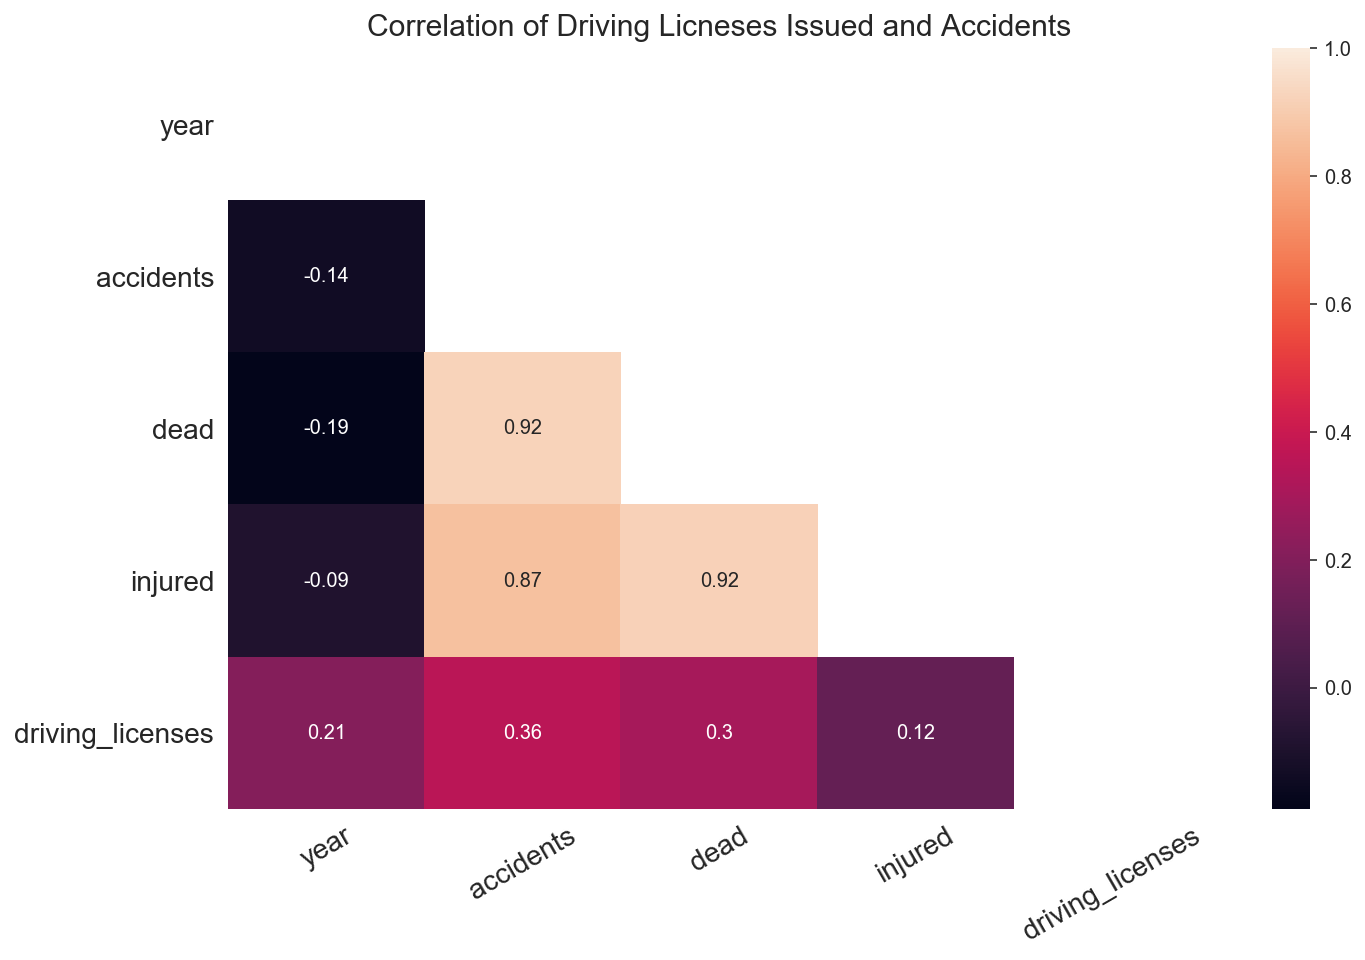

In [558]:
# A function that prints a heatmap with the upper triangle masked 
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11, 7))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    
    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.title("Correlation of Driving Licneses Issued and Accidents", fontsize=15)
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()


df_with_target = combined_datasets.copy()
correlation_heat_map(df_with_target)

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [559]:
# A fucntion that take a df and column names and print a histogram for each 
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    print(len(list_of_columns))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,8)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], int(dataframe.shape[0]/24)) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_title(list_of_xlabels[i])
    fig.tight_layout()

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

4


/Users/ghalib/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ghalib/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


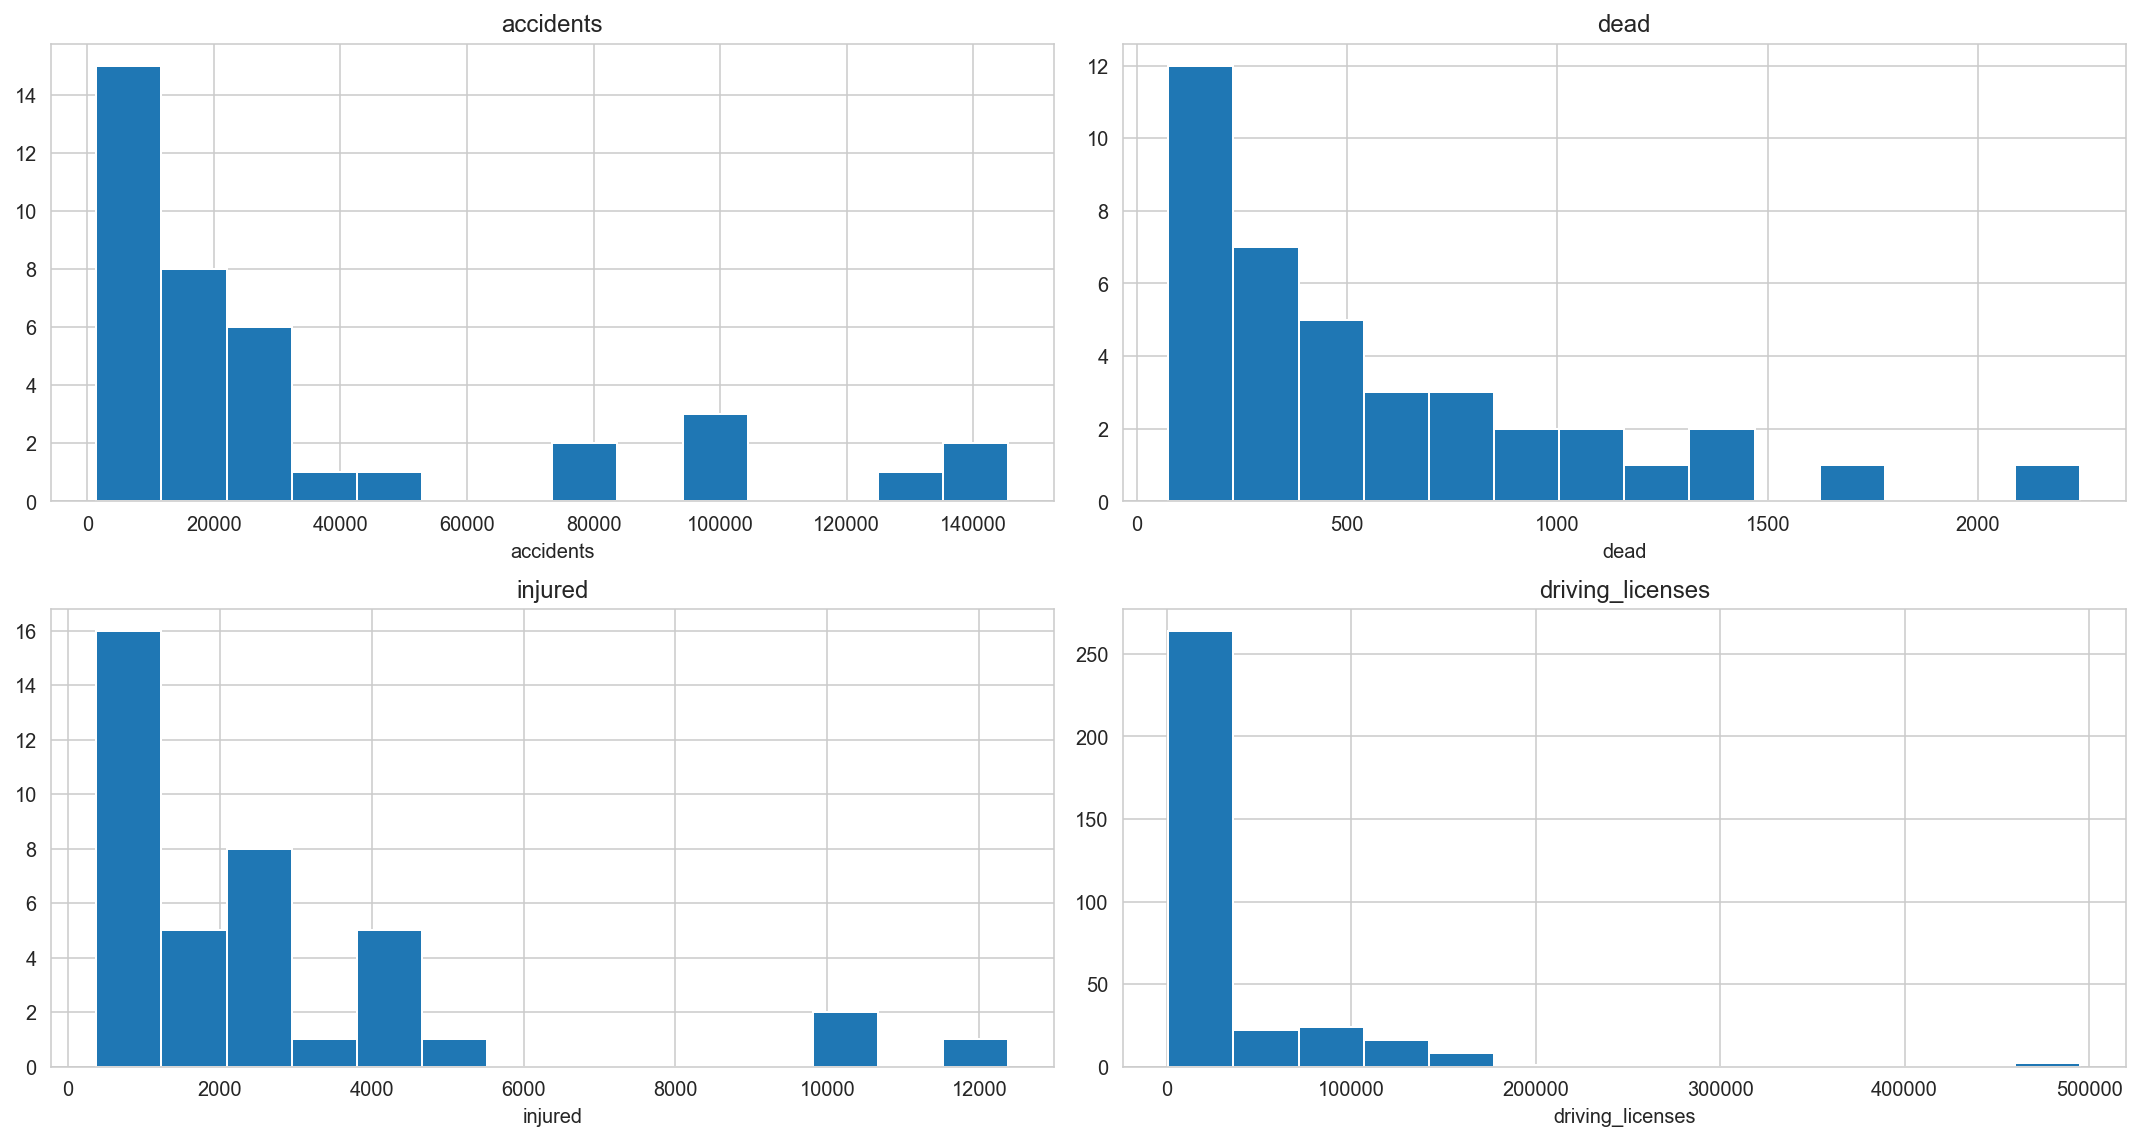

In [560]:
# Getting column names
columns = combined_datasets.columns

# Excluding region and year
columns = columns.drop('region')
columns = columns.drop('year')

# Calling the function to print histograms for us
subplot_histograms(combined_datasets, columns, columns, columns)


All histograms are skewed to the right and we can say that many of our rows display low values 

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


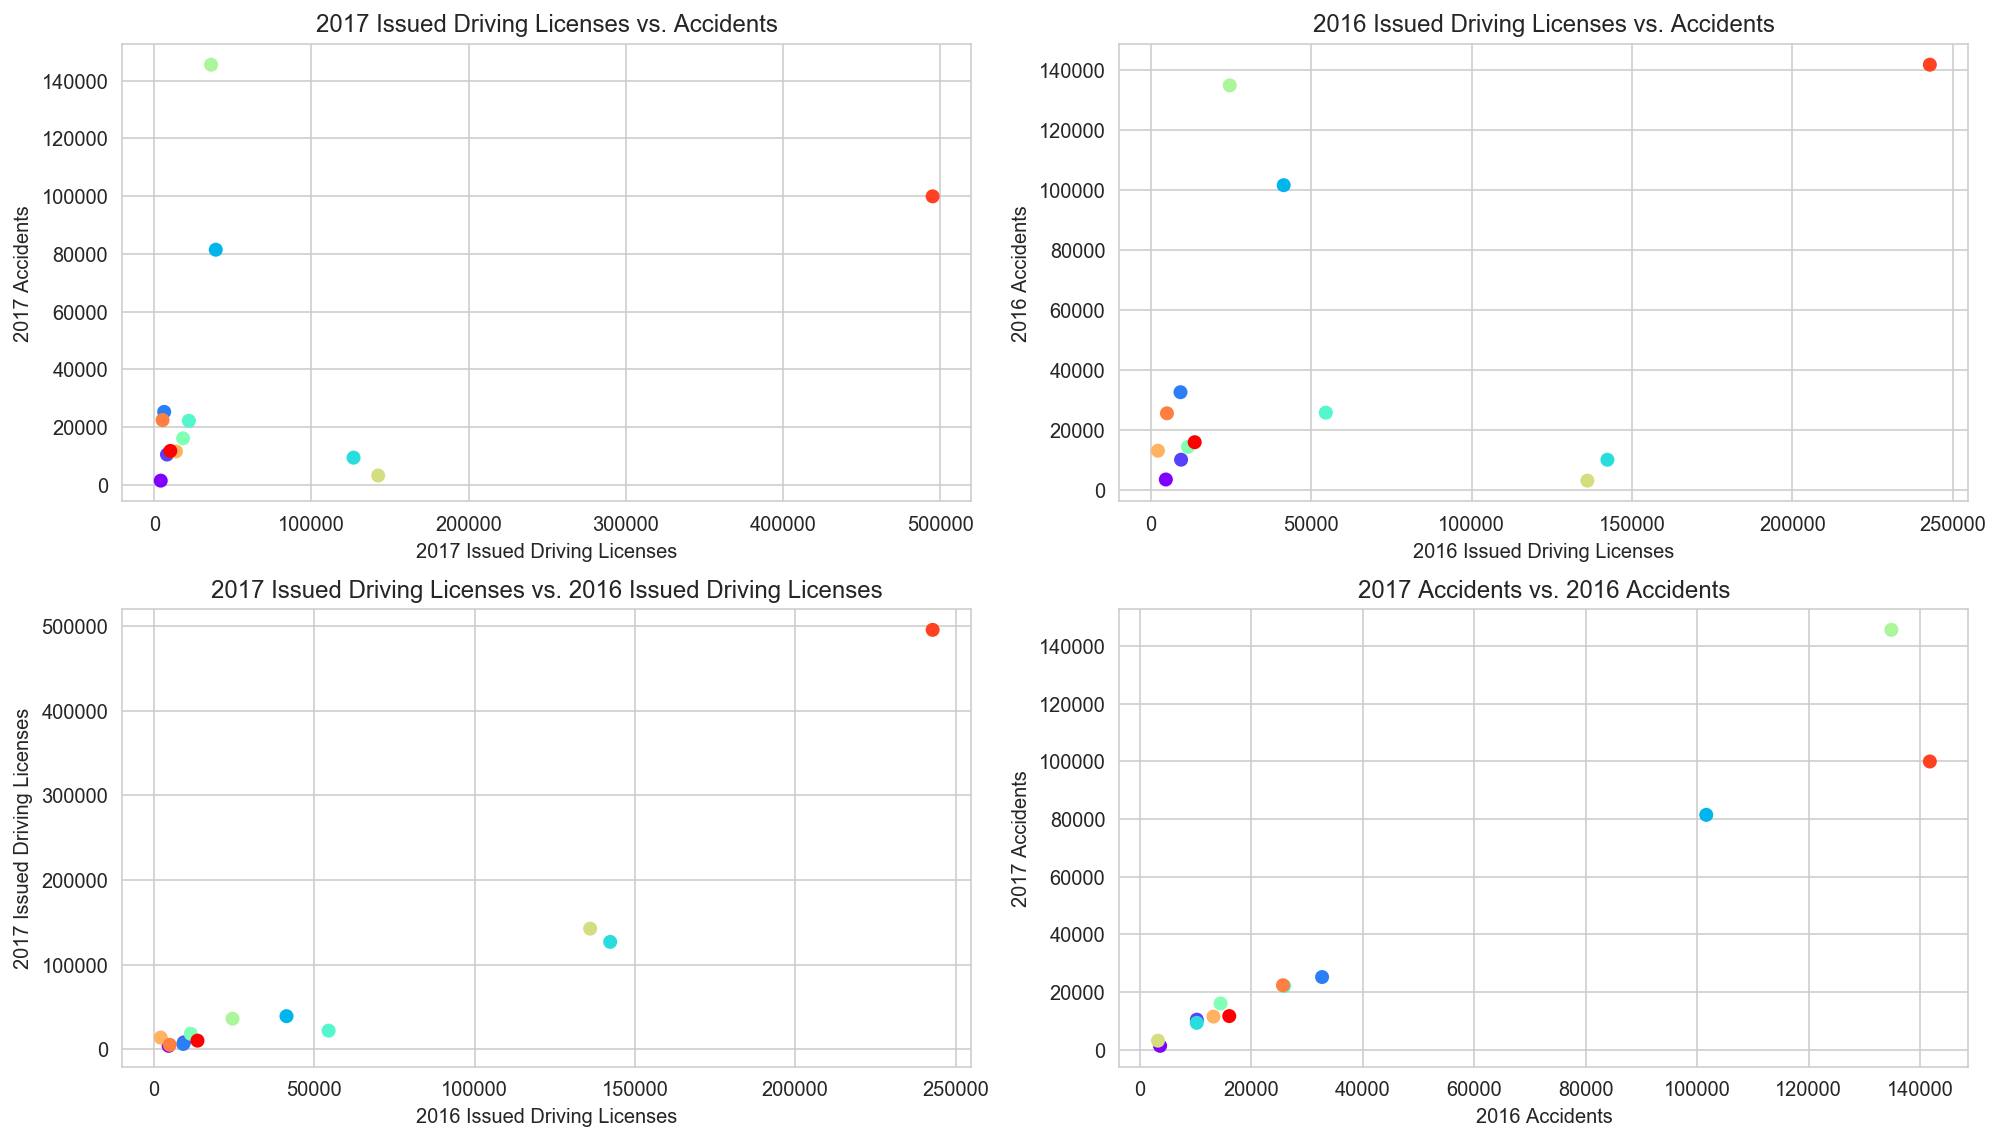

In [561]:
# Importing cm for color maps and setting its range to 13 color 
import matplotlib.cm as cm
c = np.arange(13)

# Choosing the rainbow color map
colors = cm.rainbow(np.linspace(0, 1, 13))

# Creating subplots for the scatter plot 
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

# Plot row 0 col 0
# Setting x and y as driving licenses vs accidnets for 2017
x = combined_datasets['driving_licenses'].loc[combined_datasets['year'] == 2017]
y = combined_datasets['accidents'].loc[combined_datasets['year'] == 2017]

# Calling Scatter for driving licenses vs accidnets for 2017
ax[0][0].scatter(x, y, c=colors)

# Setting the labels and titles based on x and y axis used
ax[0][0].set(xlabel="2017 Issued Driving Licenses", ylabel="2017 Accidents")
ax[0][0].set_title('2017 Issued Driving Licenses vs. Accidents')

# Plot row 0 col 1
# Setting x and y as driving licenses vs accidnets for 2016
x1 = combined_datasets['driving_licenses'].loc[combined_datasets['year'] == 2016]
y1 = combined_datasets['accidents'].loc[combined_datasets['year'] == 2016]

# Calling Scatter for driving licenses vs accidnets 2016
ax[0][1].scatter(x1, y1, c=colors)

# Setting the labels and titles based on x and y axis used
ax[0][1].set(xlabel="2016 Issued Driving Licenses", ylabel="2016 Accidents")
ax[0][1].set_title('2016 Issued Driving Licenses vs. Accidents')

# Plot row 1 col 0
# Setting x and y as driving licenses 2016 - 2017
x2 = combined_datasets['driving_licenses'].loc[combined_datasets['year'] == 2016]
y2 = combined_datasets['driving_licenses'].loc[combined_datasets['year'] == 2017]

# Calling Scatter for driving licenses 2016 - 2017
ax[1][0].scatter(x2, y2, c=colors)

# Setting the labels and titles based on x and y axis used
ax[1][0].set(xlabel="2016 Issued Driving Licenses", ylabel="2017 Issued Driving Licenses")
ax[1][0].set_title('2017 Issued Driving Licenses vs. 2016 Issued Driving Licenses')

# Plot row 1 col 1
# Setting x and y as accidnets 2016 - 2017
x3 = combined_datasets['accidents'].loc[combined_datasets['year'] == 2016]
y3 = combined_datasets['accidents'].loc[combined_datasets['year'] == 2017]

# Calling Scatter for accidnets 2016 - 2017
ax[1][1].scatter(x3, y3, c=colors)

# Setting the labels and titles based on x and y axis used
ax[1][1].set(xlabel="2016 Accidents", ylabel="2017 Accidents")
ax[1][1].set_title('2017 Accidents vs. 2016 Accidents')

# Faxing the layout so it does not overlap on each other 
plt.tight_layout()

- Driving Licenses vs. Accidents 2017:


    We can see that mostly the accidents and driving licenses were clustered in the range of 
    30000 accidents and also about 30000 driver licenses issued 
    
    
    There are a few regions that seem like they might be outliers; however, those regions are
    probably the big cities and if we seperate them in a different plot things will look differently 
    
    
    The plot also does not imply that high driving license issuing correlate with accidents
    

- Driving Licenses vs. Accidents 2016:


    We can see that the cluster we observed in 2017 was actually contained in a higher limit in 2016 accident wise 
    
    
    This might imply that 2017 might have had lower accidents than 2016 in many regions while seeing an increase in driver licenses being issued 
    
    
    Also, we observe the same points that might look like outliers; however, this shows a pattern that we might         confirm in the driving license scatter plots as being the big cities 
    

- Issued Driving Licenses 2017 vs. 2016:


    Overall, the cluster of driving licenses in 2016 - 2017 seems to be small under 20000 2017 and 25000 for 2016; however, we have the outliers that now I can say are probably big cities 
    
  
 - Accidents 2017 vs. 2016:
 
    Overall, the cluster of accidents in 2016 - 2017 seems to be small under 20000 for 2017 and 20000 for 2016; however, we have the outliers look like they are a pattern between all plots
    
    
    Those are big cities such as Riyadh, Makkah, Eastern and Madinah regions 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

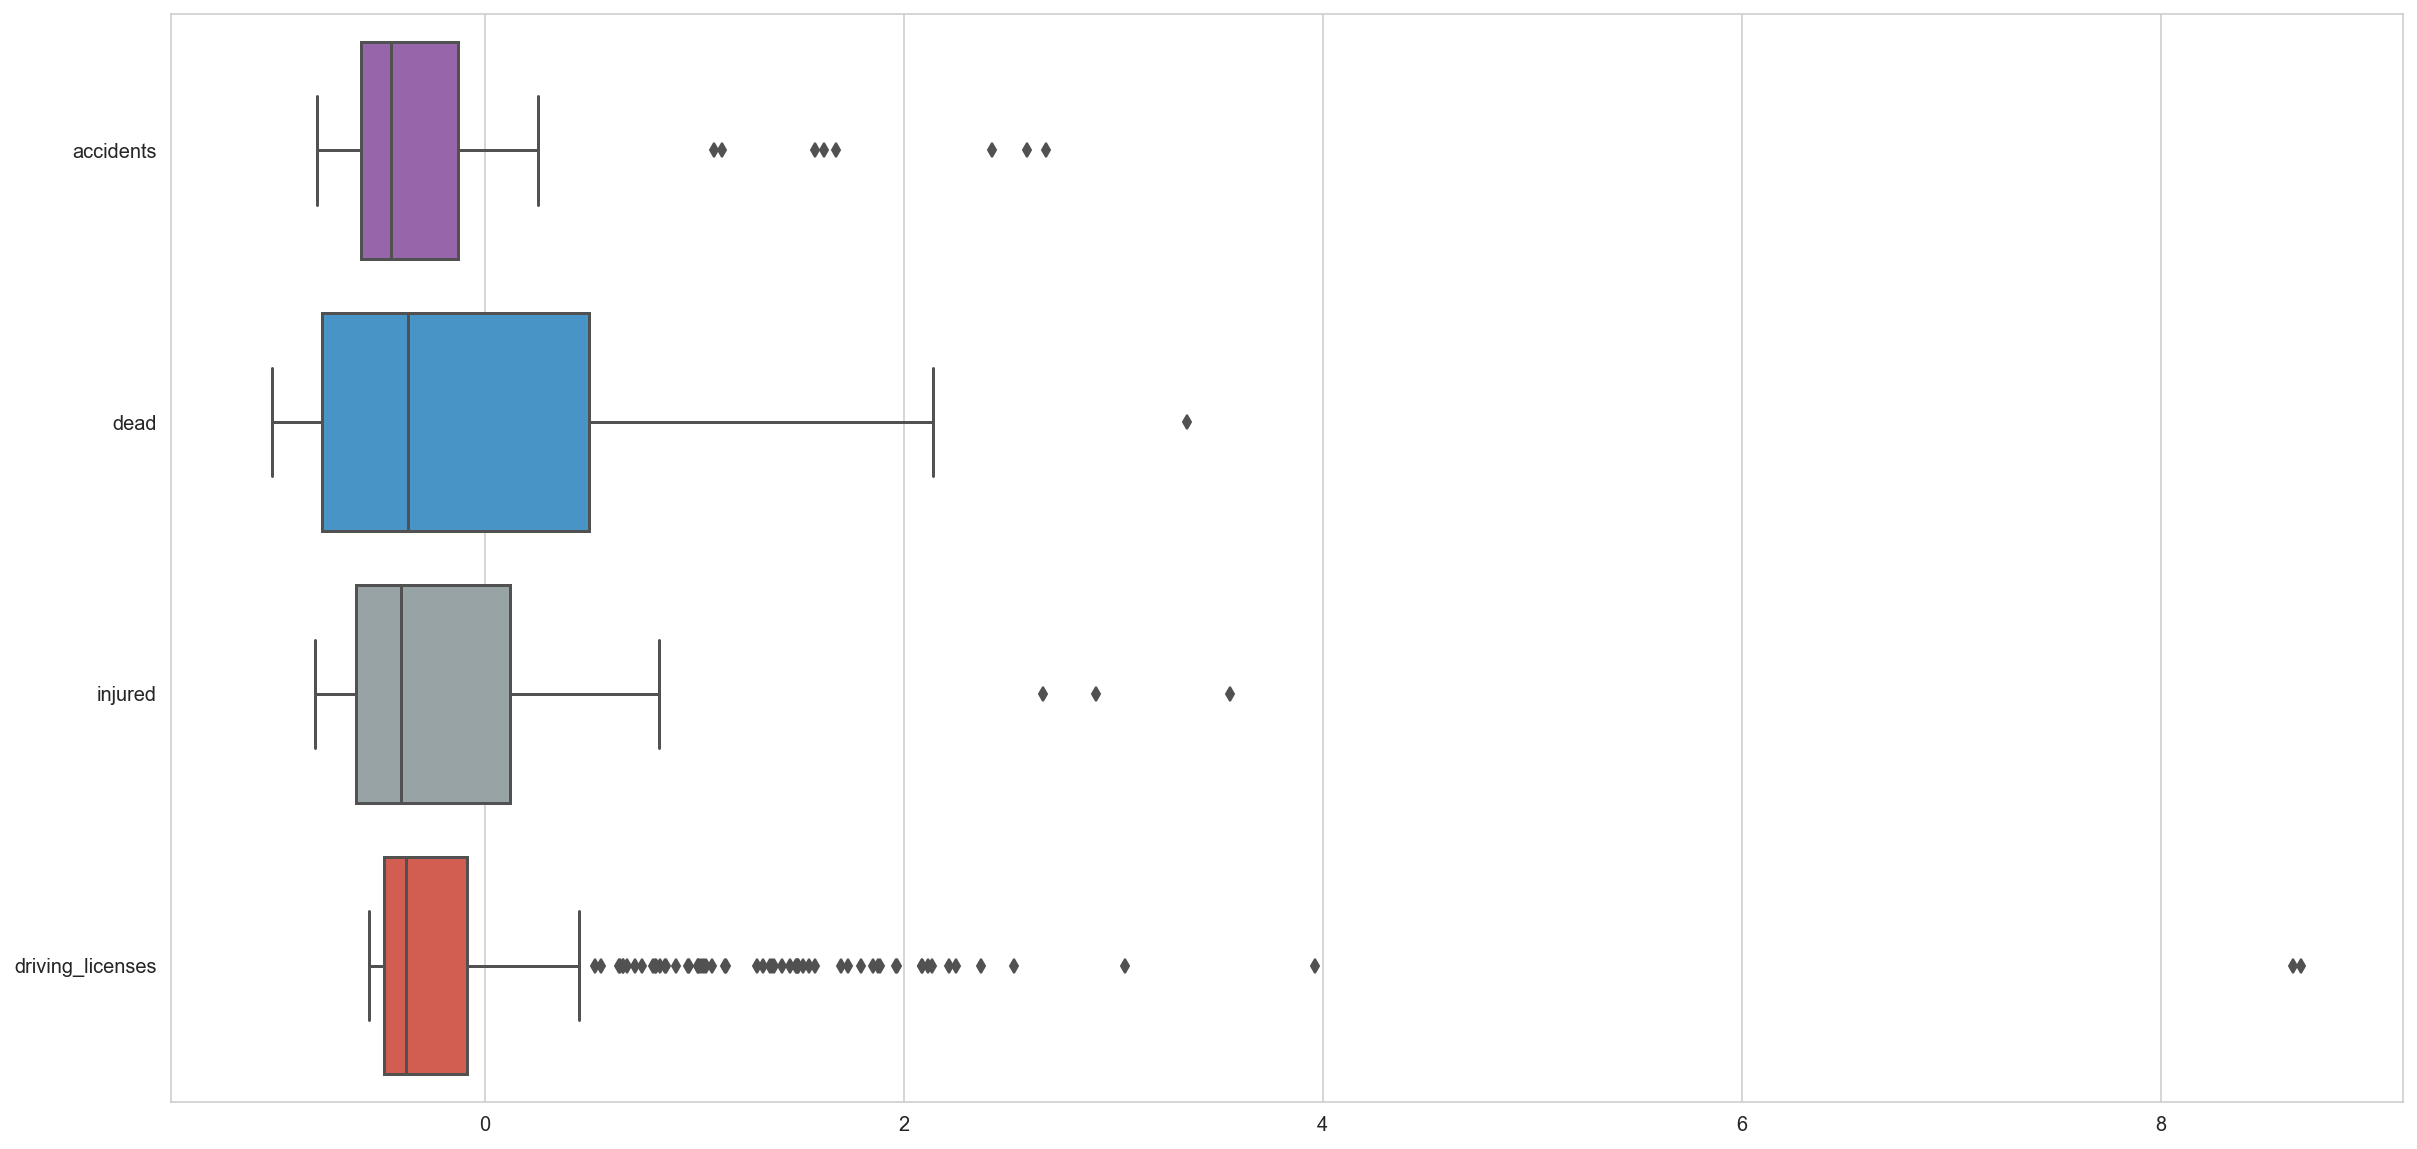

In [562]:
# Importing standardScaler to standarize the data
from sklearn.preprocessing import StandardScaler

# An array of colour values
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

# Defining the standardization function 
ss = StandardScaler()

# Copying the orignal combined data
df = combined_datasets.copy()

# Dropping unnecessary columns
df = df.drop('region', axis =1)
df = df.drop('year', axis =1)

# Standarizing the data
X= pd.DataFrame(ss.fit_transform(df), columns=df.columns)

# Ploting the boxplot
fig = plt.subplots(figsize=(20,  10))
sns.boxplot(data=X, orient="h", palette=flatui)


The boxplot shows a lot of outliers, but as we identified in the scatter plot, 
those are the major regions causing all the noise.

If we remove them from original data set we will get something with less outliers 

Those cities are highly populated and thus, more driving licenses being issued and more accidents 

We can see that accidents and driving licenses are similar IQR thus similar variations 

We can also see high variance between driving licenses and the number of dead people in accidents 

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

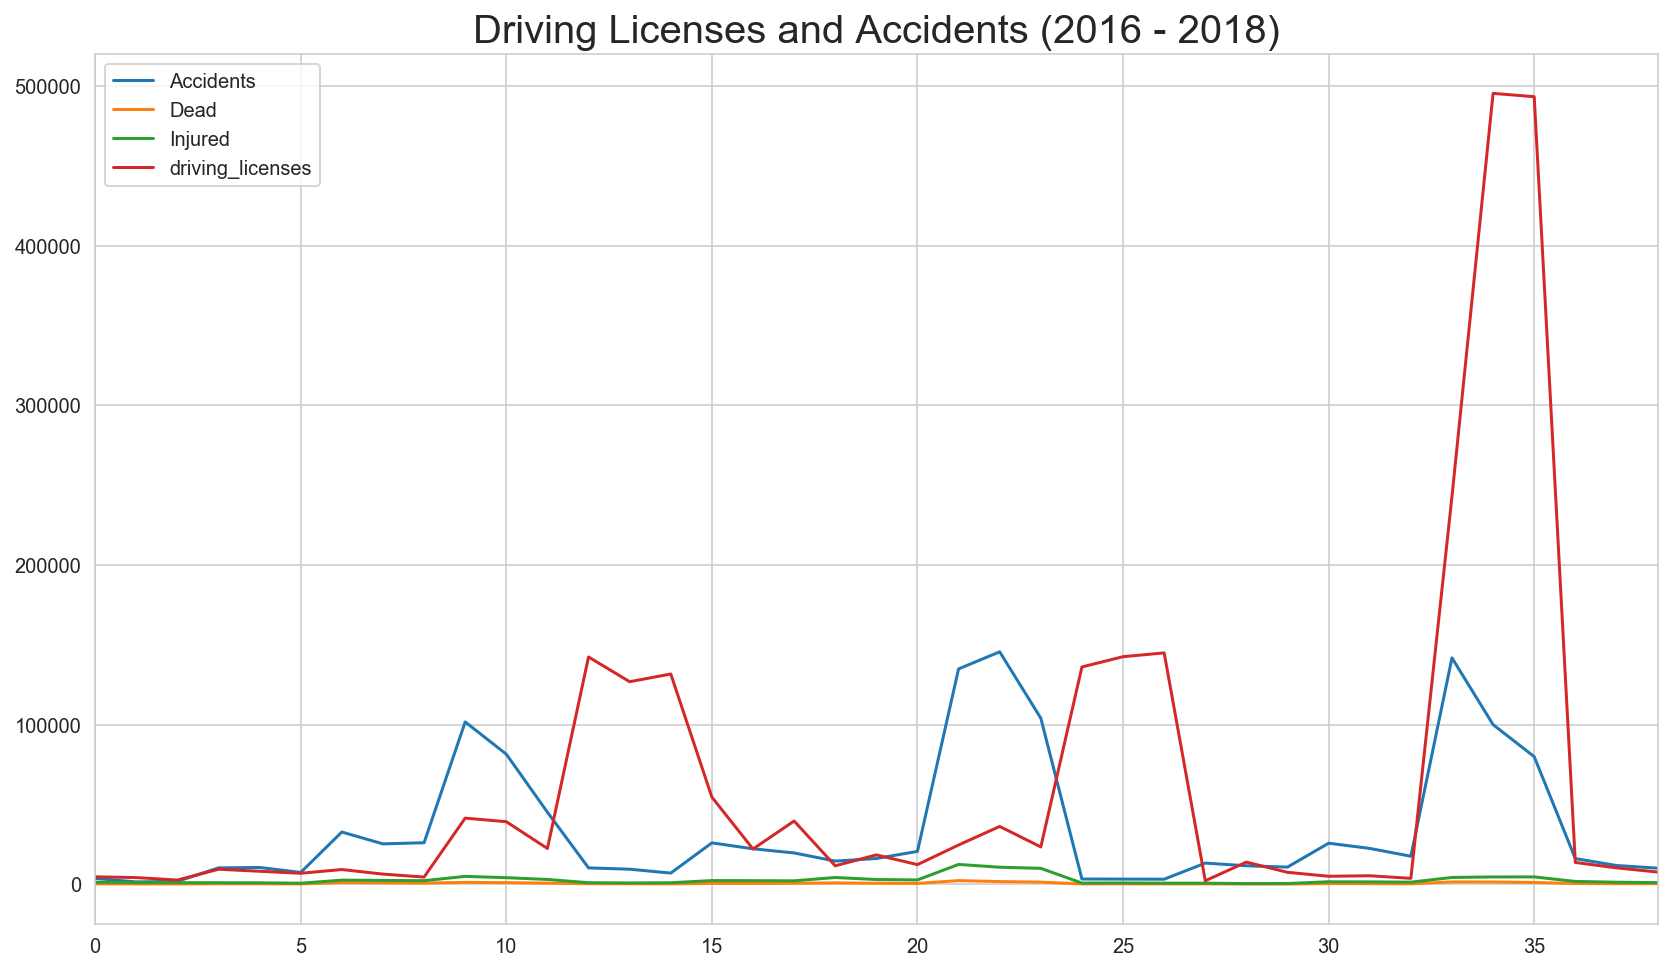

In [563]:
# Setting figure size and copying original combined data
fig, ax = plt.subplots(figsize=(14, 8))
df4 = combined_datasets.copy()

# Excluding years before 2016
df4 = df4.loc[df4.year > 2015]

# Ploting Accidents, dead, injured and driving licenses 
plt.plot(df4['accidents'])
plt.plot(df4['dead'])
plt.plot(df4['injured'])
plt.plot(df4['driving_licenses'])

# Setting title, margins and legend
plt.margins(x=0)
plt.title("Driving Licenses and Accidents (2016 - 2018)", fontsize=20)
plt.legend(['Accidents', 'Dead', 'Injured', 'driving_licenses'])

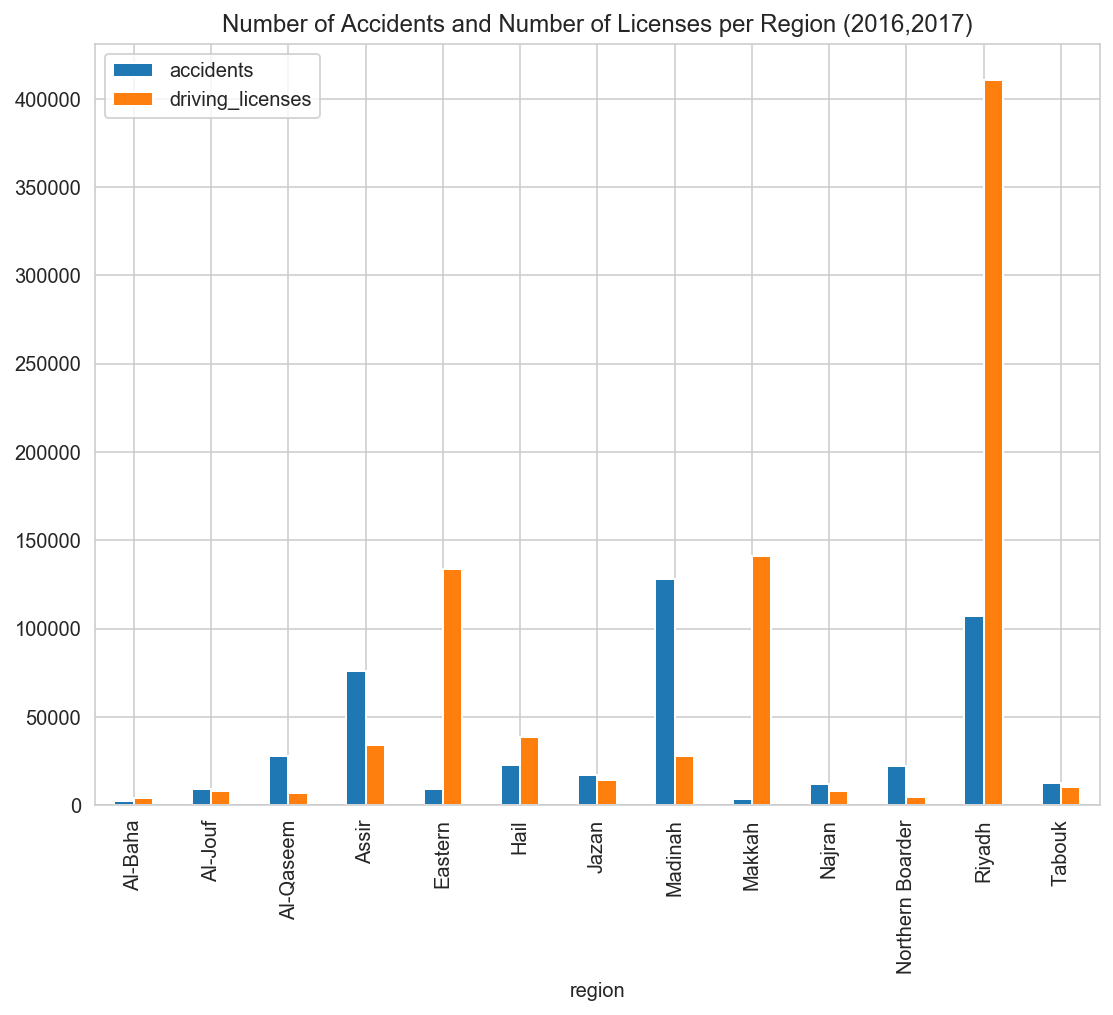

In [564]:
# Grouping and ploting by region index and accident/ driving license column
df4.groupby('region')['accidents','driving_licenses'].mean().plot(kind='bar',figsize=(9,7))
plt.title('Number of Accidents and Number of Licenses per Region (2016,2017)')
plt.xlabel('region')
plt.show();

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

For many of the varibales if not all, the spread is mostly contained in a lower range, we only observe the big regions impacting the plots and showing as outliers 

Those regions are not outliers and they are true values that happen to be legitimate but large in scale compared to the other regions 

We notice the hidtograms showing right skewness and displaying a lot of low values, this is understandable since there are not many regions and years surpassing the mean of the years for accidents and driving licenses only 6 and 7 regions in 2016 - 2017 pass there means respectively 


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No, non of the variables such as dead, injured, accidents and driving licenses in the data are normally distrubuted

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

For all of the variables that were plotted using a histogram above, we can see the all of them are right skwed 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [565]:
from scipy.stats import normaltest, skew

In [566]:
# Dropping unnecessary columns
numeric_columns = combined_datasets.columns
numeric_columns = numeric_columns.drop('region')
numeric_columns = numeric_columns.drop('year')
numeric_columns

Index(['accidents', 'dead', 'injured', 'driving_licenses'], dtype='object')

In [567]:
df_stat = combined_datasets.copy()
df_stat.dropna(inplace=True)

In [568]:
# For each column, we will get the pvalue and determine the 
for col in numeric_columns:
    pvalue = normaltest(df_stat[col]).pvalue
    col_skew = skew(df_stat[col])
    
    # If pvalue is less than 0.5, then it is not normally distributed
    if pvalue < .05:
        print('{} is not normally distributed because the pvalue {} is less than .05. The skew is {}\n'
              .format(col, round(pvalue,2), round(col_skew,2)))
    else:
        # If pvalue is greater than 0.5, then it is normally distributed
        print('{} is normally distributed because the pvalue {} is greater than .05. The skew is {}\n'
              .format(col, round(pvalue,2), round(col_skew,2)))

accidents is not normally distributed because the pvalue 0.0 is less than .05. The skew is 1.56

dead is not normally distributed because the pvalue 0.0 is less than .05. The skew is 1.41

injured is not normally distributed because the pvalue 0.0 is less than .05. The skew is 2.19

driving_licenses is not normally distributed because the pvalue 0.0 is less than .05. The skew is 2.78



In [569]:
# Creating a function to return the sample means
def sample_means(population, n, k):
    sampling_means =[]
    for i in range(k):
        sample = np.random.choice(population, size = n)
        sampling_means.append(np.mean(sample))
    return sampling_means

# Creating a function to return the upper and lower percentiles 
def confidence_interval_mean(population, confidence, sample_size):
    
    # Get the sample means and sample std
    means = sample_means(population, int(sample_size*0.1), 2*int(sample_size*0.1))
    sample_mean = np.mean(means)
    sample_std = np.std(means)
    
    # Confidance for the z-score
    
    if confidence >= 99:
        distance = 2.576
    elif confidence >= 95:
        distance = 1.960
    else:
        distance = 1.645
    
    con_range_lower = sample_mean-(distance*(sample_std/np.sqrt(int(round(sample_size, 0)))))
    con_range_upper = sample_mean+(distance*(sample_std/np.sqrt(int(round(sample_size, 0)))))

    return (con_range_lower, con_range_upper)

In [570]:
# For each column, we want to get the upper and lower quintiles
for col in numeric_columns:
    
    # We call a function to return the quintiles
    lower, upper = confidence_interval_mean(df_stat[col], 90, len(df_stat[col]))
    print('We can be 90% confident that the population mean for {} lies between {} and {}\n'
          .format(col, round(lower,2), round(upper,2)))

We can be 90% confident that the population mean for accidents lies between 27329.23 and 37152.88

We can be 90% confident that the population mean for dead lies between 492.99 and 667.79

We can be 90% confident that the population mean for injured lies between 2760.01 and 3722.1

We can be 90% confident that the population mean for driving_licenses lies between 84473.92 and 144267.86



## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Text(0.5, 1.0, '2018 Accidents vs. 2017 Accidents')

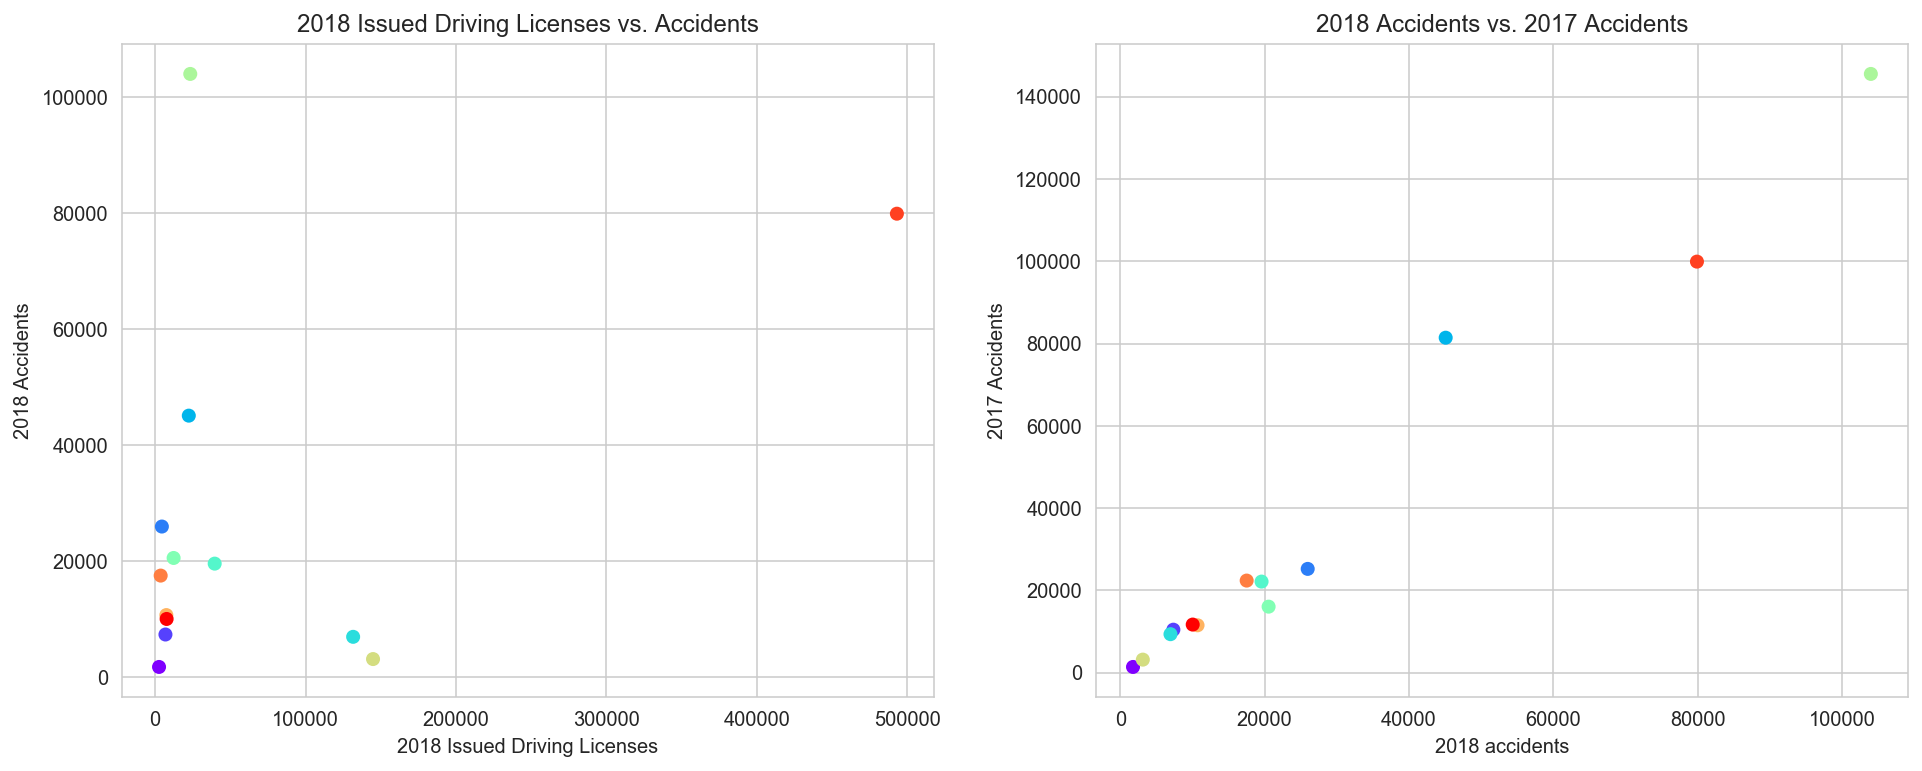

In [571]:
# Creating subplots for the scatter plot 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot row 0 col 0
# Setting x and y as driving licenses vs accidnets for 2017
x4 = combined_datasets['driving_licenses'].loc[combined_datasets['year'] == 2018]
y4 = combined_datasets['accidents'].loc[combined_datasets['year'] == 2018]

# Calling Scatter for driving licenses vs accidnets for 2018
ax[0].scatter(x4, y4, c=colors)

# Setting the labels and titles based on x and y axis used
ax[0].set(xlabel="2018 Issued Driving Licenses", ylabel="2018 Accidents")
ax[0].set_title('2018 Issued Driving Licenses vs. Accidents')

# Plot row 0 col 1
# Setting x and y as driving licenses vs accidnets for 2016
x5 = combined_datasets['accidents'].loc[combined_datasets['year'] == 2018]
y5 = combined_datasets['accidents'].loc[combined_datasets['year'] == 2017]

# Calling Scatter for driving licenses vs accidnets 2016
ax[1].scatter(x5, y5, c=colors)

# Setting the labels and titles based on x and y axis used
ax[1].set(xlabel="2018 accidents", ylabel="2017 Accidents")
ax[1].set_title('2018 Accidents vs. 2017 Accidents')

In [572]:
# In my outside research, I have found data for car plates issued and population by region 
df_saudi_car_plates = pd.read_csv("/Users/ghalib/Desktop/DSI7/week2/day5/Project1/data/saudi-arabia-car-plates-issued-in-the-kingdom-by-type-2004-2008.csv", sep = ';')
df_saudi_population = pd.read_csv("/Users/ghalib/Desktop/DSI7/week2/day5/Project1/data/saudi-population-10-years-and-over-by-gender-age-groups-and-educational-status.csv", sep = ';')
df_saudi_population_region_not_cleaned = pd.read_csv("/Users/ghalib/Desktop/DSI7/week2/day5/Project1/data/saudi-arabia-population-by-administrative-region-nationality-and-sex.csv", sep=';')
copy_of_combined = combined_datasets.copy()


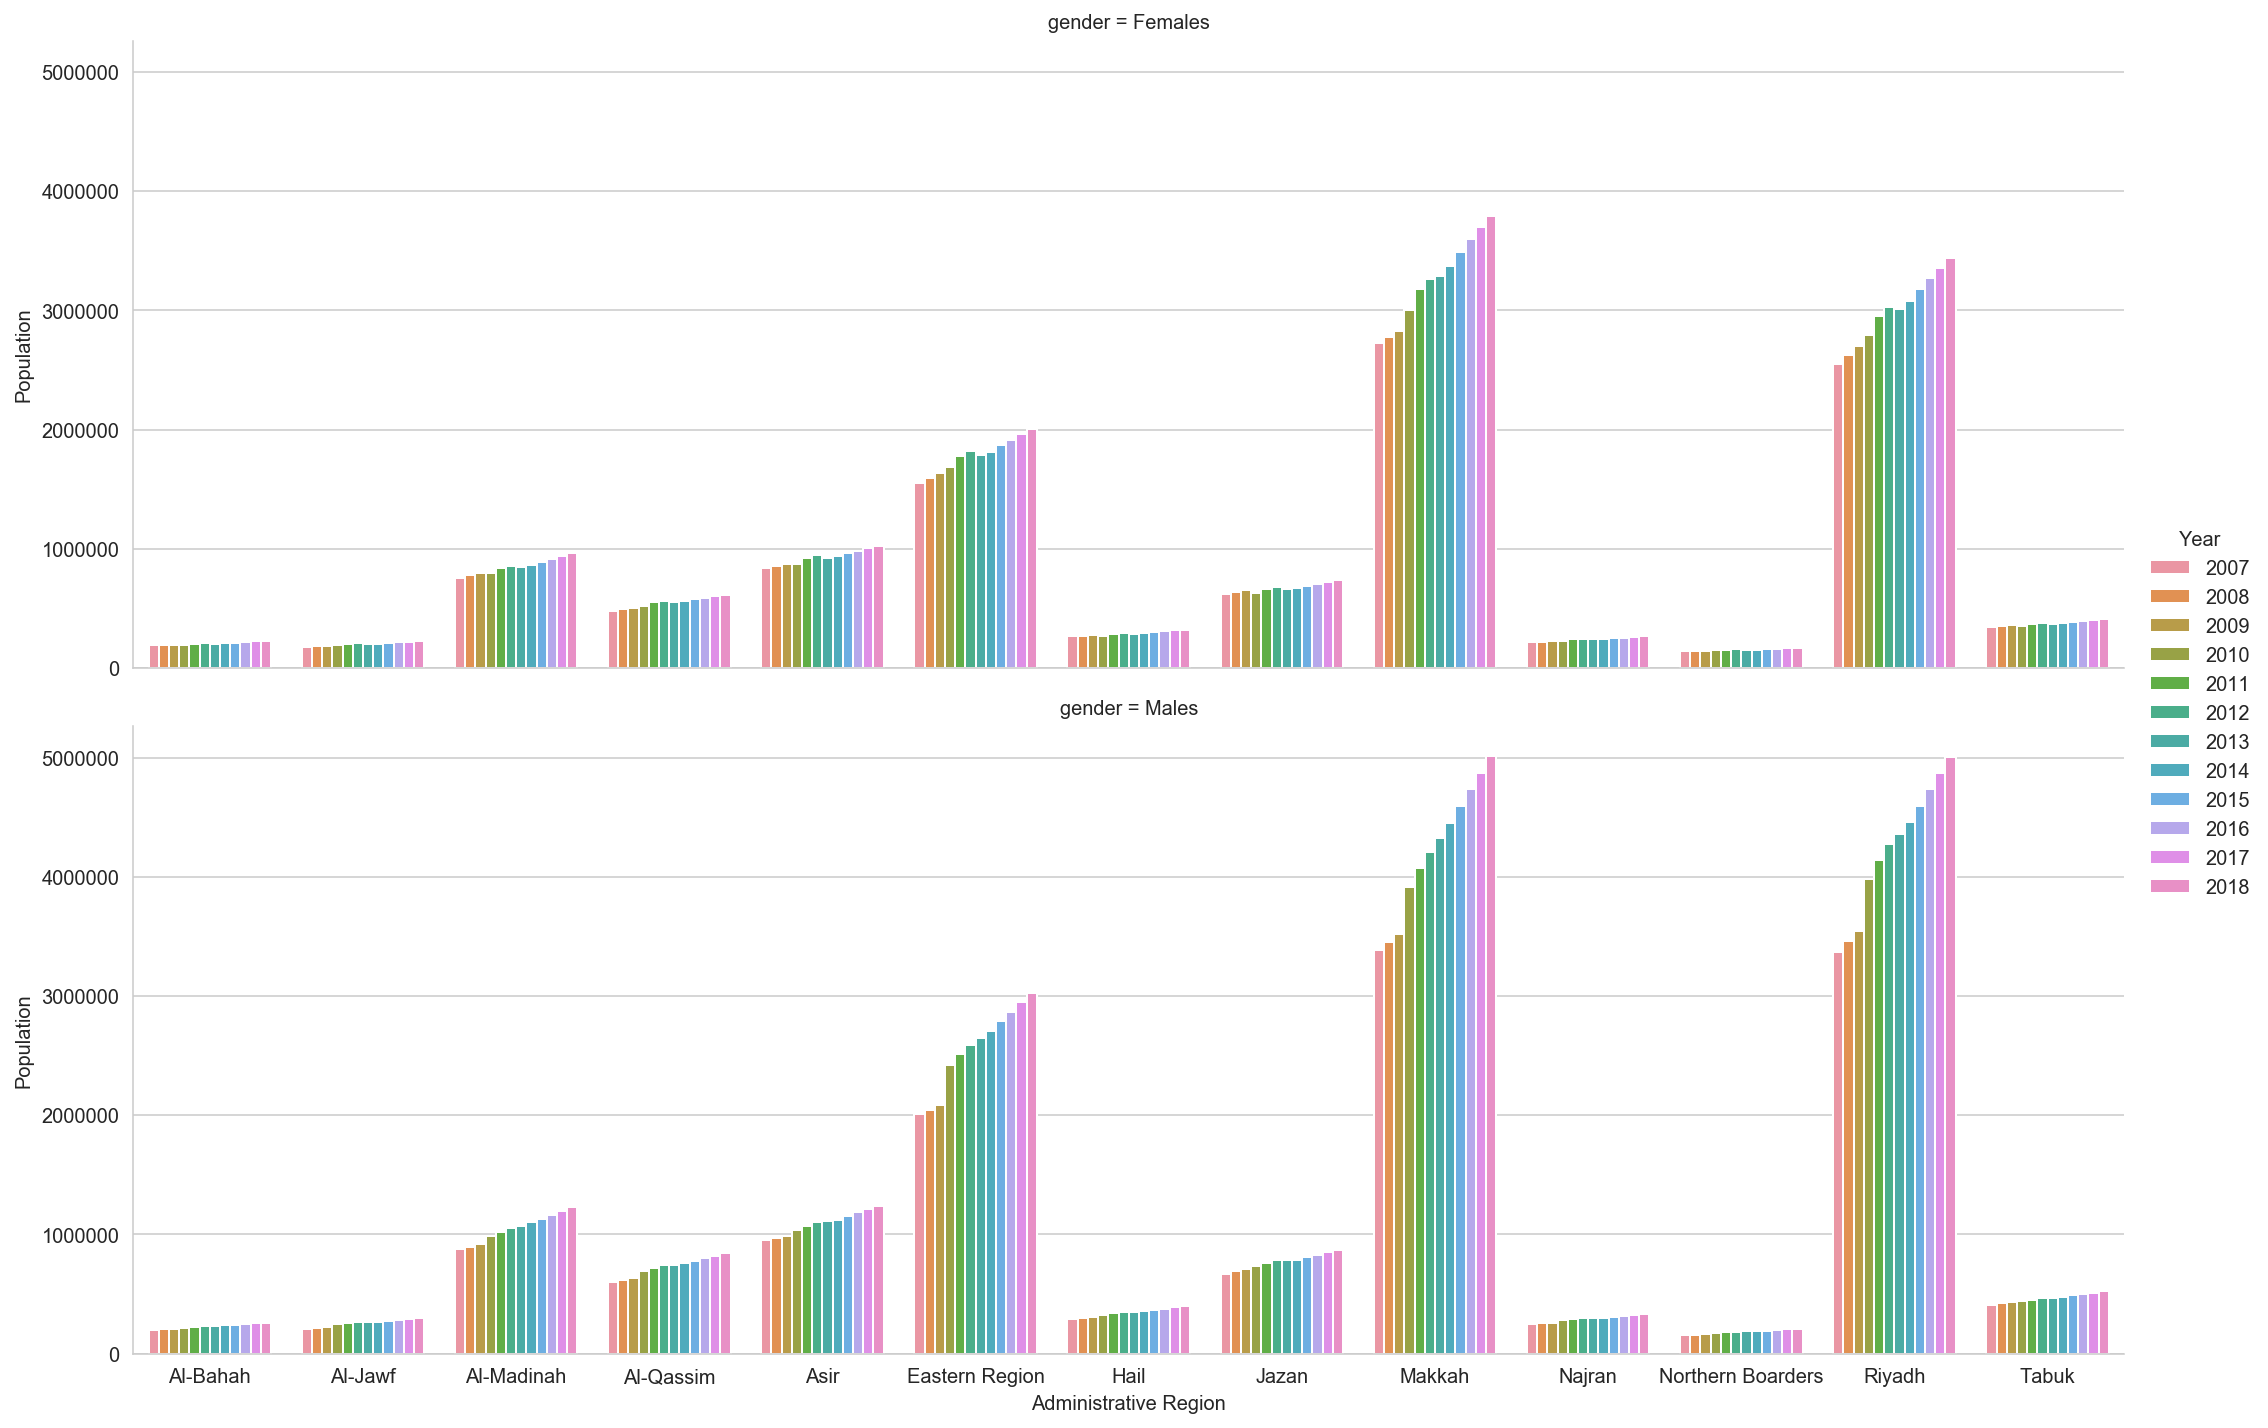

In [573]:
# Getting only the columns we need
df_saudi_population_region = df_saudi_population_region_not_cleaned[['Year', 'Administrative Region', 'gender', 'Population']]

# Removing unnecessary rows
df_saudi_population_region = df_saudi_population_region.loc[df_saudi_population_region['Administrative Region'] != 'Total'] 
df_saudi_population_region = df_saudi_population_region.loc[df_saudi_population_region['gender'] != 'Total'] 

# Grouping to have a better understanding 
df_saudi_population_region_new = df_saudi_population_region.groupby(['gender', 'Administrative Region', 'Year'])['Administrative Region', 'Population'].sum()

# Reseting the index for plot use 
df_saudi_population_region_new.reset_index(inplace=True)

# Plotting the data
sns.catplot(data=df_saudi_population_region_new, x='Administrative Region', y='Population', hue='Year', kind='bar', legend_out = True, aspect=3, row='gender')

Text(0.5, 1, 'Number of Car Plates vs Years for Every Vehicale Type')

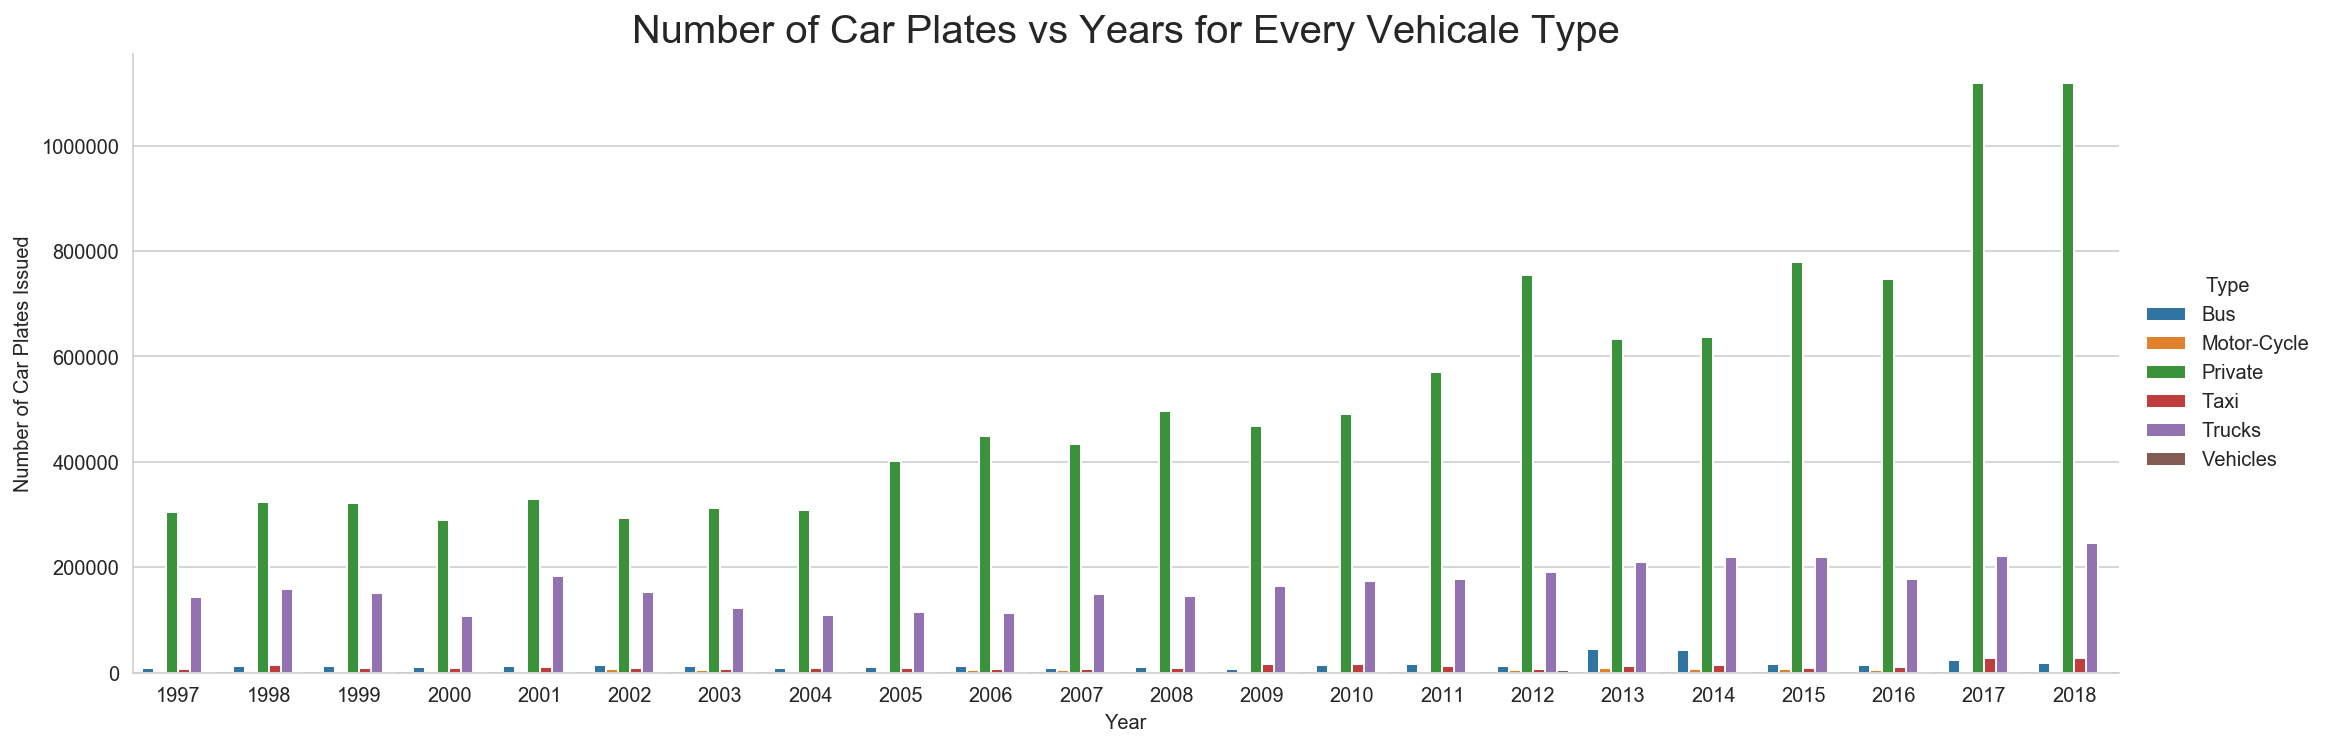

In [574]:
# Removing unnecessary rows
df_saudi_car_plates = df_saudi_car_plates.loc[df_saudi_car_plates['Type'] != 'total']

# Grouping to have a better understanding 
df_saudi_car_plates_grouped = df_saudi_car_plates.groupby(['Year', 'Type'])['Number of Car Plates Issued'].sum()

# Reseting the index for plot use 
df_saudi_car_plates_grouped = df_saudi_car_plates_grouped.reset_index()

# Plotting the data and giving it a title 
sns.catplot(data=df_saudi_car_plates_grouped, x='Year', y='Number of Car Plates Issued', hue='Type', kind='bar', legend_out = True, aspect=3)
plt.title("Number of Car Plates vs Years for Every Vehicale Type", fontsize=20)


In [575]:
# Trying to create a heatmap with the research data
# Getting necessar columns, grouping and reseting index
combined_research = df_saudi_car_plates[['Year', 'Number of Car Plates Issued']]
combined_research = combined_research.groupby('Year').sum()
combined_research.reset_index(inplace=True)

# Getting a copy of combined original data with 2018 data
# Grouping and reseting index also
copy_of_combined_original = combined_datasets.copy()
copy_of_combined_accidents = copy_of_combined_original.groupby('year')['driving_licenses' , 'accidents'].sum()
copy_of_combined_accidents.reset_index(inplace=True)

# Removing any rows with 0 value in accidents
copy_of_combined_accidents = copy_of_combined_accidents.loc[copy_of_combined_accidents['accidents'] != 0]

# Renaming columns and getting ready for merge 
combined_research.rename(columns={"Year": "year", "Number of Car Plates Issued": "car_plates"}, inplace=True)

# Pivoting first DF and reseting index
copy_of_combined_accidents_pv = pd.pivot_table(copy_of_combined_accidents, columns=['year'], values=['driving_licenses','accidents'], fill_value=np.nan)
copy_of_combined_accidents_pv.reset_index(inplace=True)

# Pivoting second DF
combined_research_pv = pd.pivot_table(combined_research, columns=['year'], values=['car_plates'], fill_value=np.nan)

# Merging Data and droping nan rows 
combined_research_data = copy_of_combined_accidents.merge(combined_research, left_on=['year'], right_on=['year'], how='outer')
combined_research_data.dropna()

,year,driving_licenses,accidents,car_plates
0,2016,697017.0,533380.0,957125.0
1,2017,928165.0,460488.0,1395709.0
2,2018,899844.0,352464.0,1417486.0


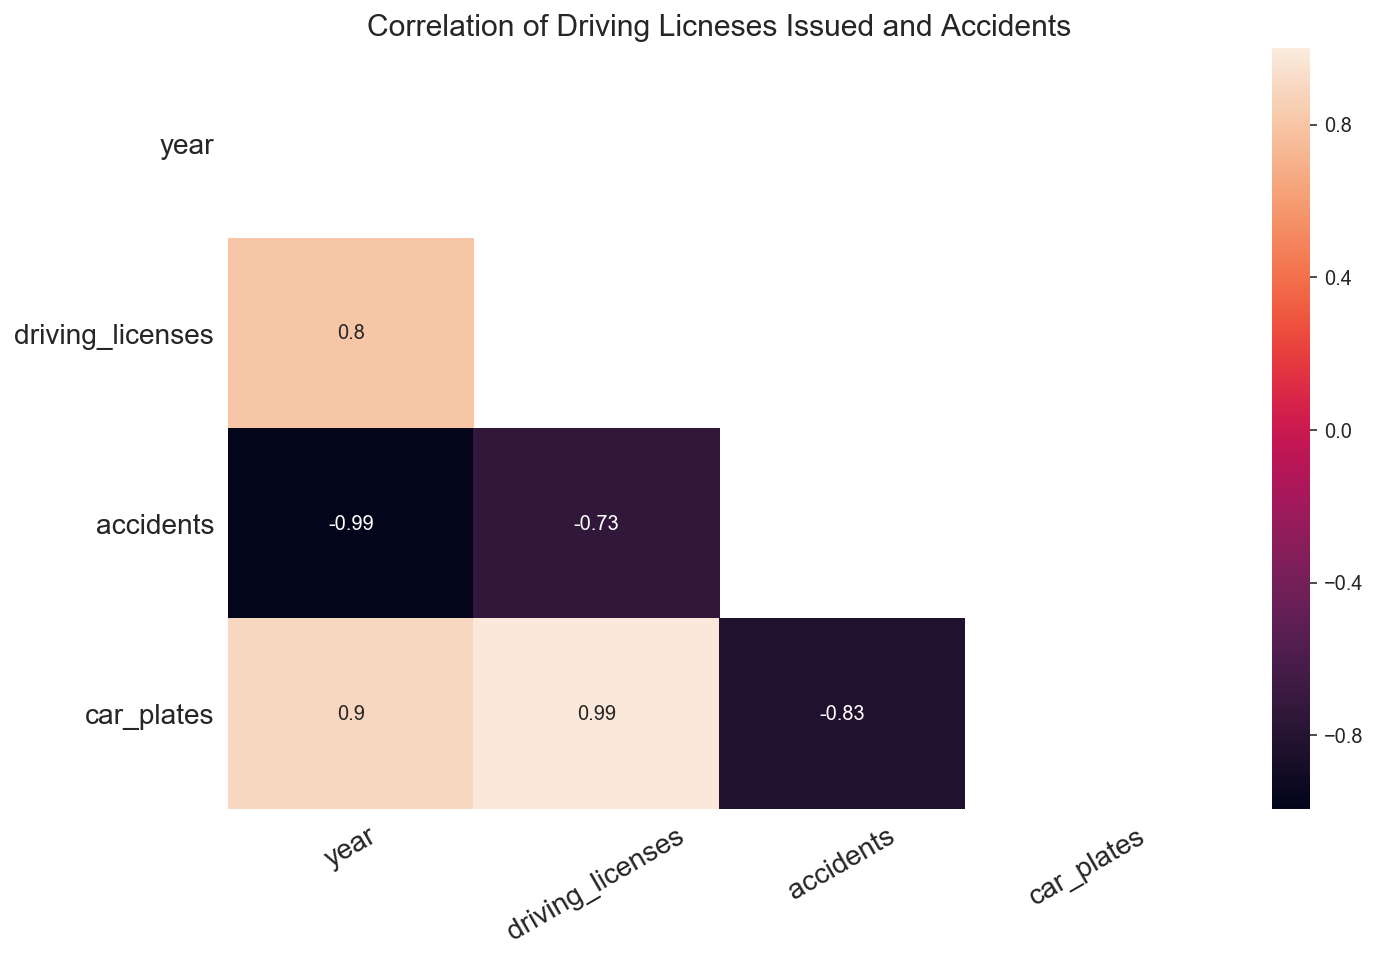

In [576]:
# Calling the function correlation_heat_map to create a heatmap with a masked upper triangle
correlation_heat_map(combined_research_data)

Text(0.5, 1, 'Educational Status for Females by Age Group 2016')

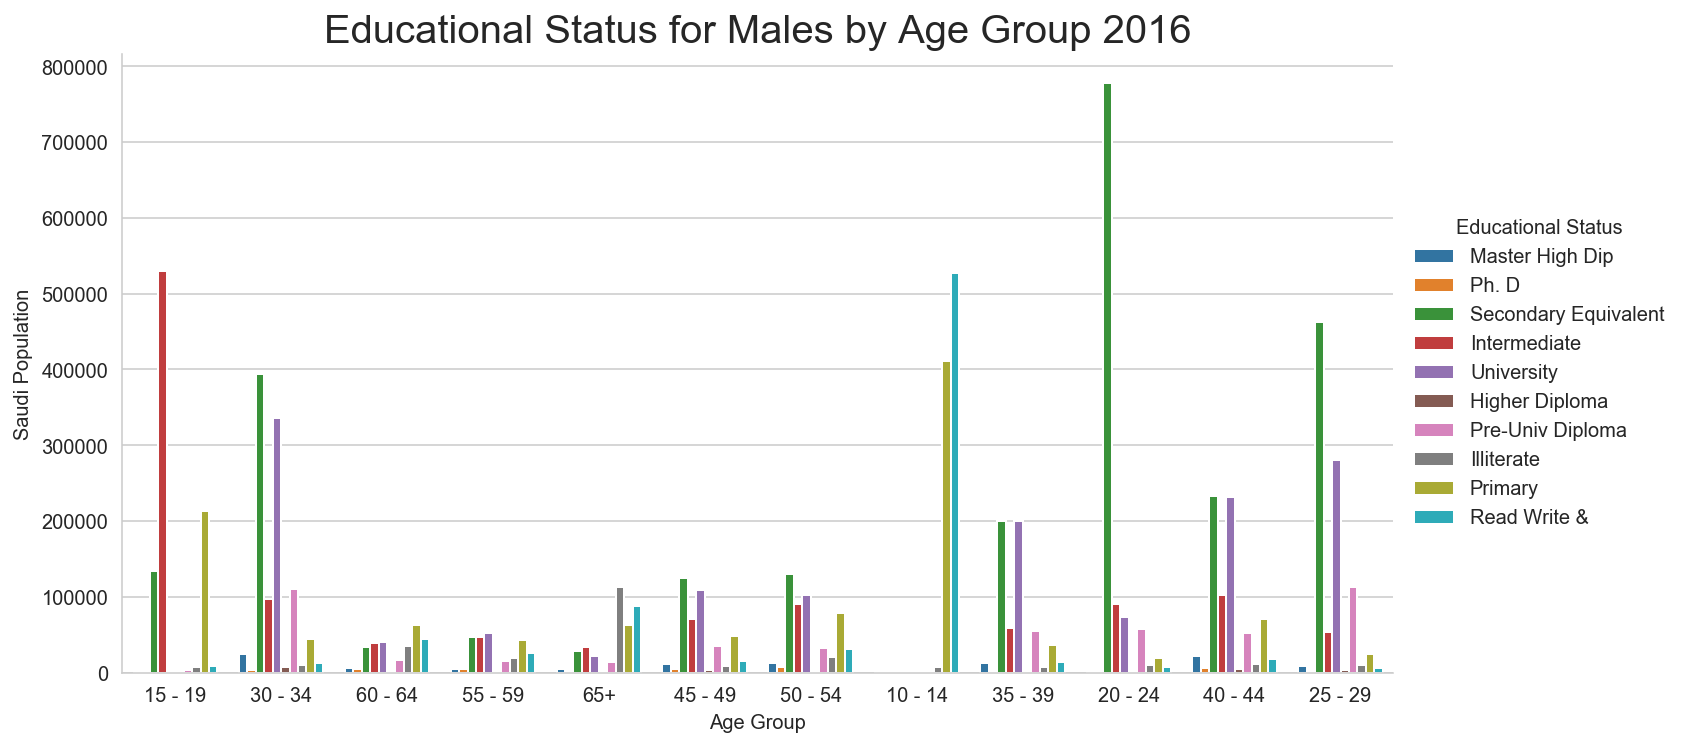

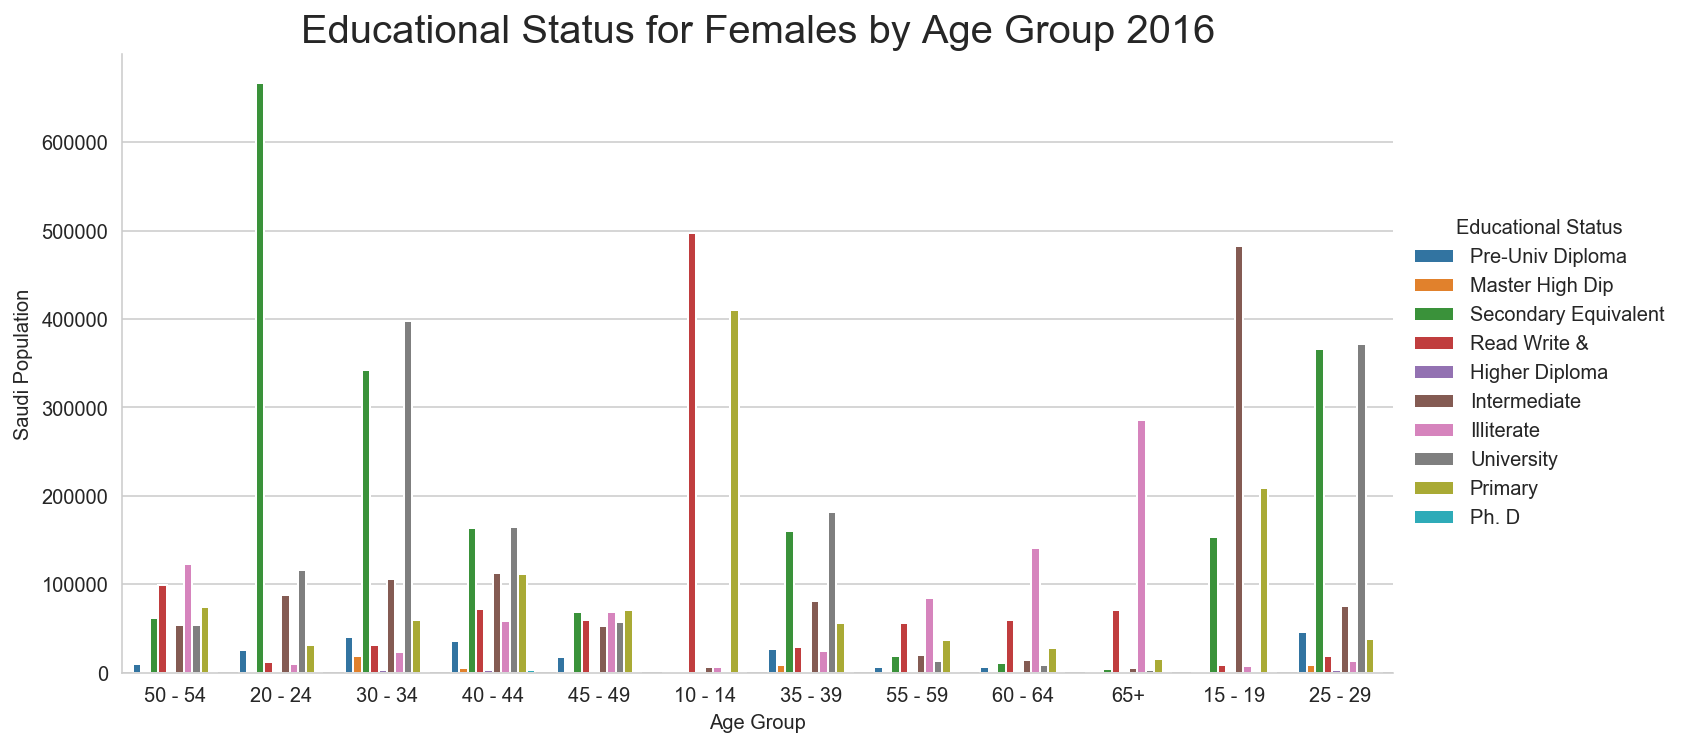

In [577]:
# This is data for the population devided by age group and educaiton level 
# I did not know how to use it, if there was a use for it 
# I kept it here because I would like to have feedback on it
# if there was a possible use, I would like to know what was it
# Thank you 

# Removing rows with total in it
df_grouped_2 = df_saudi_population.loc[df_saudi_population['Age Group'] != 'Total']
df_grouped_2 = df_grouped_2.loc[df_grouped_2['Gender'] != 'Total']
df_grouped_2 = df_grouped_2.loc[df_grouped_2['Educational Status'] != 'Total']

# Seperating Male and Female DFs
df_grouped_2_m = df_grouped_2.loc[df_grouped_2['Gender'] == 'Male']
df_grouped_2_f = df_grouped_2.loc[df_grouped_2['Gender'] == 'Female']

# Dropping year column since it is not relevant
df_grouped_2.drop('Year', axis=1, inplace=True)
df_grouped_2.reset_index(inplace=True)


# Plotting two plots, one for male and the other for female 
sns.catplot(data=df_grouped_2_m, x='Age Group', y='Saudi Population', hue='Educational Status', kind='bar', legend_out = True, aspect=2)
plt.title("Educational Status for Males by Age Group 2016", fontsize=20)

sns.catplot(data=df_grouped_2_f, x='Age Group', y='Saudi Population', hue='Educational Status', kind='bar', legend_out = True, aspect=2)
plt.title("Educational Status for Females by Age Group 2016", fontsize=20)


## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer:

the data provided are very small and are very difficult to work with. Extra data is needed to be able to provide a clear conclusion on this topic. As for now, some insight might be provided regarding general information. 

Many regions seem to have a low accident and driving license issuing rate except for Riyadh, Makkah, Eastern and Madinah 
Those regions are considered highly populated in the kingdom and have an increasing population every year 

From my research, I have noticed that regions that have a flat almost unchanging population every year, tend to fall under the lowest regions with car accidents and driving licenses issuing 

While regions that have a rapidly increasing population tend to be high on the list of highest accidents and driving licenses. Assir and Madinah are a really good example where there is a steady but fast increase every year in the population.

Looking at the drivers license and accidents for 2016 - 2018 I have noticed a pattern that looked interesting connecting driving licenses and accidents 

The big regions are often the ones with high accident and high driving licenses issuing, with more data on sevral years, we might be able to establish a clear correlation between the two for major regions. As for small regions there does not seem to be a correlation right now, but with more data things might change. Our heatmap show a negative correlation between driving licenses and accidents and I believe this is due to the clusteration of data under the mean value for many of the other regions. I also included in my research the number of car plates being issued for the years we already have and by looking at the heatmap we can see a strong positive correlation between issuing a car plate and issuing a driving license but a negative correlation with accidents, similar to the accidents and driving license correlation.

I recommend gathering more data consistently to be able to provide accurate results in the future such as, saher data, impact of new driving regulations and the impact of women driving 